In [1]:
#!conda install -c conda-forge geopy --yes 
#from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

#!conda install -c conda-forge folium=0.5.0 --yes
#import folium # plotting library

print('Folium installed')
print('Libraries imported.')

Folium installed
Libraries imported.


In [2]:
CLIENT_ID = '02XI22LSV2ONB4TDCQKNMUXPECHUXN0BHAFDKXUFRLPQSY1Q' # your Foursquare ID
CLIENT_SECRET = 'KZFNH24O4EIKJIN35YNZW5CXKMBSCLGIPI2KXQXF2Y2TEQGG' # your Foursquare Secret
VERSION = '20180604'
#LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 02XI22LSV2ONB4TDCQKNMUXPECHUXN0BHAFDKXUFRLPQSY1Q
CLIENT_SECRET:KZFNH24O4EIKJIN35YNZW5CXKMBSCLGIPI2KXQXF2Y2TEQGG


In [3]:
#search_query = 'Chinese'
#radius = 5000
near = "San Antonio, TX"
#print(search_query + ' .... OK!')

In [4]:
base_url = 'https://api.foursquare.com/v2/venues/search'
parameters = {"near": near ,  "client_id": CLIENT_ID , "client_secret" :  CLIENT_SECRET , "v" :VERSION, "limit": 1000}
#client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
base_url,parameters

('https://api.foursquare.com/v2/venues/search',
 {'client_id': '02XI22LSV2ONB4TDCQKNMUXPECHUXN0BHAFDKXUFRLPQSY1Q',
  'client_secret': 'KZFNH24O4EIKJIN35YNZW5CXKMBSCLGIPI2KXQXF2Y2TEQGG',
  'limit': 1000,
  'near': 'San Antonio, TX',
  'v': '20180604'})

In [5]:
#results = requests.get(url).json()
results = requests.get(base_url, params = parameters).json()
results

{'meta': {'code': 200, 'requestId': '5c22fc0f6a607133fa022fec'},
 'response': {'confident': False,
  'geocode': {'feature': {'cc': 'US',
    'displayName': 'San Antonio, TX, United States',
    'geometry': {'bounds': {'ne': {'lat': 29.731074999999997,
       'lng': -98.222708},
      'sw': {'lat': 29.230895, 'lng': -98.81344999999999}},
     'center': {'lat': 29.42412, 'lng': -98.49363}},
    'highlightedName': '<b>San Antonio</b>, <b>TX</b>, United States',
    'id': 'geonameid:4726206',
    'longId': '72057594042654142',
    'matchedName': 'San Antonio, TX, United States',
    'name': 'San Antonio',
    'slug': 'san-antonio-texas',
    'woeType': 7},
   'parents': [],
   'what': '',
   'where': 'san antonio tx'},
  'venues': [{'categories': [{'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/religious_church_',
       'suffix': '.png'},
      'id': '4bf58dd8d48988d132941735',
      'name': 'Church',
      'pluralName': 'Churches',
      'primary': True,
      'short

In [6]:
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe = json_normalize(venues)
dataframe.head()

,categories,delivery.id,delivery.provider.icon.name,delivery.provider.icon.prefix,delivery.provider.icon.sizes,delivery.provider.name,delivery.url,hasPerk,id,location.address,...,location.crossStreet,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.postalCode,location.state,name,referralId,venuePage.id
0,"[{'id': '4bf58dd8d48988d132941735', 'name': 'C...",NaN,NaN,NaN,NaN,NaN,NaN,False,4ad4bffef964a520f3ea20e3,115 W Main Plz,...,NaN,"[115 W Main Plz, San Antonio, TX 78205, United...","[{'label': 'display', 'lat': 29.42445959712935...",29.424460,-98.493613,78205,TX,San Fernando Cathedral,v-1545796624,NaN
1,"[{'id': '4bf58dd8d48988d12b941735', 'name': 'C...",NaN,NaN,NaN,NaN,NaN,NaN,False,4bb08897f964a520464a3ce3,100 Dolorosa,...,NaN,"[100 Dolorosa, San Antonio, TX 78205, United S...","[{'label': 'display', 'lat': 29.42321234496511...",29.423212,-98.493719,78205,TX,Bexar County Courthouse,v-1545796624,NaN
2,"[{'id': '4bf58dd8d48988d12b941735', 'name': 'C...",NaN,NaN,NaN,NaN,NaN,NaN,False,4e26f07fa809510950dbdc92,NaN,...,NaN,"[San Antonio, TX, United States]","[{'label': 'display', 'lat': 29.42414414786921...",29.424144,-98.493591,NaN,TX,County Court 8 of Bexar County TX,v-1545796624,NaN
3,"[{'id': '4bf58dd8d48988d164941735', 'name': 'P...",NaN,NaN,NaN,NaN,NaN,NaN,False,4bbe1906b42aef3b97664bc3,100 W Main Plz,...,btwn E Commerce St & W Market/Dolorosa,[100 W Main Plz (btwn E Commerce St & W Market...,"[{'label': 'display', 'lat': 29.42458767477948...",29.424588,-98.493285,78205,TX,Main Plaza Park,v-1545796624,NaN
4,"[{'id': '4bf58dd8d48988d1f1931735', 'name': 'G...",NaN,NaN,NaN,NaN,NaN,NaN,False,50b4feace4b0818e9afd0b96,NaN,...,NaN,"[San Antonio, TX 78205, United States]","[{'label': 'display', 'lat': 29.42475970408229...",29.424760,-98.493585,78205,TX,Main Plaza Farmer's Market,v-1545796624,NaN


In [8]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

dataframe_filtered

,name,categories,address,cc,city,country,crossStreet,formattedAddress,labeledLatLngs,lat,lng,postalCode,state,id
0,San Fernando Cathedral,Church,115 W Main Plz,US,San Antonio,United States,NaN,"[115 W Main Plz, San Antonio, TX 78205, United...","[{'label': 'display', 'lat': 29.42445959712935...",29.424460,-98.493613,78205,TX,4ad4bffef964a520f3ea20e3
1,Bexar County Courthouse,Courthouse,100 Dolorosa,US,San Antonio,United States,NaN,"[100 Dolorosa, San Antonio, TX 78205, United S...","[{'label': 'display', 'lat': 29.42321234496511...",29.423212,-98.493719,78205,TX,4bb08897f964a520464a3ce3
2,County Court 8 of Bexar County TX,Courthouse,NaN,US,San Antonio,United States,NaN,"[San Antonio, TX, United States]","[{'label': 'display', 'lat': 29.42414414786921...",29.424144,-98.493591,NaN,TX,4e26f07fa809510950dbdc92
3,Main Plaza Park,Plaza,100 W Main Plz,US,San Antonio,United States,btwn E Commerce St & W Market/Dolorosa,[100 W Main Plz (btwn E Commerce St & W Market...,"[{'label': 'display', 'lat': 29.42458767477948...",29.424588,-98.493285,78205,TX,4bbe1906b42aef3b97664bc3
4,Main Plaza Farmer's Market,General Entertainment,NaN,US,San Antonio,United States,NaN,"[San Antonio, TX 78205, United States]","[{'label': 'display', 'lat': 29.42475970408229...",29.424760,-98.493585,78205,TX,50b4feace4b0818e9afd0b96
5,227th District Court,Courthouse,300 Dolorosa,US,San Antonio,United States,Dwyer,"[300 Dolorosa (Dwyer), San Antonio, TX 78205, ...","[{'label': 'display', 'lat': 29.4243144745312,...",29.424314,-98.493832,78205,TX,4c814f67dc018cfabf7ec46c
6,Lady Justice Fountain Bexar County Water Conse...,Historic Site,300 Dolorosa,US,San Antonio,United States,NaN,"[300 Dolorosa, San Antonio, TX 78205, United S...","[{'label': 'display', 'lat': 29.42394637933925...",29.423946,-98.493473,78205,TX,4e1b2a241495517ce518b66b
7,Soho Wine & Martini Bar,Wine Bar,214 W Crockett St,US,San Antonio,United States,at Navarro St,"[214 W Crockett St (at Navarro St), San Antoni...","[{'label': 'display', 'lat': 29.42496387179004...",29.424964,-98.490272,78205,TX,4b8556eef964a520ab5731e3
8,The Empire Theater,Theater,208 E Houston St,US,San Antonio,United States,NaN,"[208 E Houston St, San Antonio, TX 78205, Unit...","[{'label': 'display', 'lat': 29.42598141664784...",29.425981,-98.491150,78205,TX,4c40ccbbe26920a18d795de7
9,mi taquito,Food Truck,NaN,US,San Antonio,United States,NaN,"[San Antonio, TX, United States]","[{'label': 'display', 'lat': 29.424185, 'lng':...",29.424185,-98.493505,NaN,TX,54320e11498eec43385d369b


In [9]:
print('{} venues were returned by Foursquare.'.format(dataframe_filtered.shape[0]))

197 venues were returned by Foursquare.


In [10]:
def getNearbyVenues(df, radius=500):
    
    venues_list=[]
    #for name, lat, lng in zip(names, latitudes, longitudes):
    for index, row in df.iterrows() :
        name = row['name']
        lat = row['lat']
        lng = row['lng']
        #print(row['name'])
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            1000)
            
        # make the GET request
        results = requests.get(url).json()["response"]
        
        if 'groups' in  results :
            results = results['groups'][0]['items']

            # return only relevant information for each nearby venue
            venues_list.append([(
                name, 
                lat, 
                lng, 
                v['venue']['name'], 
                v['venue']['location']['lat'], 
                v['venue']['location']['lng'],  
                v['venue']['categories'][0]['name']) for v in results])
        else :
            venue_list.append([(name, lat, lng,"","","","")])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighbourhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return nearby_venues

In [11]:
nearby_val = getNearbyVenues(dataframe_filtered)


In [12]:
nearby_val.head()

,Neighbourhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,San Fernando Cathedral,29.42446,-98.493613,San Fernando Cathedral,29.424460,-98.493613,Church
1,San Fernando Cathedral,29.42446,-98.493613,Biga on the Banks,29.423520,-98.492137,American Restaurant
2,San Fernando Cathedral,29.42446,-98.493613,The Esquire Tavern,29.424834,-98.491761,Cocktail Bar
3,San Fernando Cathedral,29.42446,-98.493613,Drury Plaza Hotel San Antonio Riverwalk,29.424357,-98.491746,Hotel
4,San Fernando Cathedral,29.42446,-98.493613,Main Plaza Park,29.424588,-98.493285,Plaza


In [13]:
nearby_val.shape

(18667, 7)

In [14]:
nearby_val.groupby('Neighbourhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighbourhood,,,,,,
0.0 BEGIN,100,100,100,100,100,100
131st District Court,100,100,100,100,100,100
144th District Court of Bexar County,100,100,100,100,100,100
150th District Court,100,100,100,100,100,100
166th District Court,100,100,100,100,100,100
186th District Court,100,100,100,100,100,100
187th District Court,89,89,89,89,89,89
222 Main Plaza - Law Office,100,100,100,100,100,100
226th District Court,100,100,100,100,100,100


In [15]:
print('There are {} uniques categories.'.format(len(nearby_val['Venue Category'].unique())))

There are 88 uniques categories.


In [16]:
dataframe_filtered.name.value_counts()

Via Stop                                                        1
Via Information Center Downtown                                 1
Riverview Towers, Suite 1800                                    1
Law Offices of Fidel Rodriguez, Jr.                             1
226th District Court                                            1
St Mary's Church                                                1
County Court 5 of Bexar County                                  1
Cricket Wireless Authorized Retailer                            1
Room 616                                                        1
The Margarita Bar                                               1
Super Taco of SA                                                1
Presiding District Court (Rm 218) of Bexar County Courthouse    1
Presiding Courtroom                                             1
Bee's & Sisy's                                                  1
222 Main Plaza - Law Office                                     1
Tommy's   

In [17]:
# one hot encoding
sa_onehot = pd.get_dummies(nearby_val[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
sa_onehot['Neighbourhood'] = nearby_val['Neighbourhood'] 

# move neighborhood column to the first column
fixed_columns = [sa_onehot.columns[-1]] + list(sa_onehot.columns[:-1])
sa_onehot = sa_onehot[fixed_columns]

sa_onehot.head()

,Neighbourhood,American Restaurant,Art Gallery,Art Museum,Asian Restaurant,Automotive Shop,BBQ Joint,Bakery,Bar,Bistro,...,Sports Bar,Steakhouse,Sushi Restaurant,Taco Place,Tattoo Parlor,Theater,Theme Restaurant,Thrift / Vintage Store,Train Station,Wine Bar
0,San Fernando Cathedral,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,San Fernando Cathedral,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,San Fernando Cathedral,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,San Fernando Cathedral,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,San Fernando Cathedral,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
sa_grouped = sa_onehot.groupby('Neighbourhood').mean().reset_index()
sa_grouped

,Neighbourhood,American Restaurant,Art Gallery,Art Museum,Asian Restaurant,Automotive Shop,BBQ Joint,Bakery,Bar,Bistro,...,Sports Bar,Steakhouse,Sushi Restaurant,Taco Place,Tattoo Parlor,Theater,Theme Restaurant,Thrift / Vintage Store,Train Station,Wine Bar
0,0.0 BEGIN,0.030000,0.010000,0.010000,0.00,0.000000,0.030000,0.010000,0.070000,0.010000,...,0.00,0.040000,0.010000,0.010000,0.0,0.040000,0.010000,0.000000,0.0,0.010000
1,131st District Court,0.040000,0.010000,0.010000,0.00,0.000000,0.020000,0.000000,0.040000,0.000000,...,0.00,0.050000,0.010000,0.010000,0.0,0.040000,0.010000,0.010000,0.0,0.010000
2,144th District Court of Bexar County,0.040000,0.010000,0.010000,0.00,0.000000,0.020000,0.010000,0.040000,0.000000,...,0.00,0.050000,0.010000,0.010000,0.0,0.030000,0.010000,0.010000,0.0,0.010000
3,150th District Court,0.040000,0.010000,0.010000,0.00,0.000000,0.020000,0.000000,0.030000,0.000000,...,0.00,0.050000,0.010000,0.010000,0.0,0.040000,0.010000,0.010000,0.0,0.010000
4,166th District Court,0.040000,0.010000,0.010000,0.00,0.000000,0.020000,0.010000,0.030000,0.000000,...,0.00,0.050000,0.010000,0.010000,0.0,0.040000,0.010000,0.010000,0.0,0.010000
5,186th District Court,0.030000,0.010000,0.010000,0.00,0.000000,0.030000,0.010000,0.040000,0.010000,...,0.00,0.050000,0.010000,0.010000,0.0,0.030000,0.010000,0.000000,0.0,0.010000
6,187th District Court,0.044944,0.000000,0.000000,0.00,0.011236,0.022472,0.000000,0.011236,0.000000,...,0.00,0.022472,0.011236,0.022472,0.0,0.033708,0.000000,0.011236,0.0,0.011236
7,222 Main Plaza - Law Office,0.040000,0.010000,0.010000,0.00,0.000000,0.020000,0.010000,0.030000,0.010000,...,0.00,0.060000,0.010000,0.010000,0.0,0.040000,0.010000,0.010000,0.0,0.010000
8,226th District Court,0.040000,0.010000,0.010000,0.00,0.000000,0.020000,0.010000,0.030000,0.010000,...,0.00,0.050000,0.010000,0.010000,0.0,0.030000,0.010000,0.010000,0.0,0.010000
9,227th District Court,0.040000,0.010000,0.010000,0.00,0.000000,0.020000,0.010000,0.040000,0.000000,...,0.00,0.040000,0.010000,0.010000,0.0,0.030000,0.010000,0.010000,0.0,0.010000


In [19]:
corr=sa_grouped.corr()
corr

,American Restaurant,Art Gallery,Art Museum,Asian Restaurant,Automotive Shop,BBQ Joint,Bakery,Bar,Bistro,Bridge,...,Sports Bar,Steakhouse,Sushi Restaurant,Taco Place,Tattoo Parlor,Theater,Theme Restaurant,Thrift / Vintage Store,Train Station,Wine Bar
American Restaurant,1.000000,0.150081,-0.346719,-0.282247,-0.043380,-0.640060,-0.334762,-0.359060,-0.515350,0.070377,...,-0.477337,-0.089339,0.070377,0.342823,0.076063,-0.167216,-0.245212,0.541538,0.006043,0.137393
Art Gallery,0.150081,1.000000,0.184205,0.065302,-0.487687,0.160922,0.249037,0.497262,0.163785,-0.634285,...,-0.042512,0.239215,-0.634285,-0.378541,0.768321,-0.169215,0.335993,0.142908,-0.084641,-0.432860
Art Museum,-0.346719,0.184205,1.000000,0.237487,-0.430390,0.296771,0.430788,0.404411,0.677454,-0.229272,...,0.084482,0.677552,-0.229272,-0.716549,-0.095669,0.507998,0.800578,-0.610798,-0.095669,-0.079544
Asian Restaurant,-0.282247,0.065302,0.237487,1.000000,-0.200028,0.165606,0.277222,0.296364,0.356320,-0.102332,...,0.290933,0.127793,-0.102332,-0.342716,-0.024010,0.207323,0.212985,-0.366594,-0.024010,-0.057595
Automotive Shop,-0.043380,-0.487687,-0.430390,-0.200028,1.000000,0.011994,-0.624411,-0.582006,-0.300039,0.596905,...,-0.177140,-0.619599,0.596905,0.330865,-0.042505,-0.090295,-0.609801,0.284831,-0.042505,0.315772
BBQ Joint,-0.640060,0.160922,0.296771,0.165606,0.011994,1.000000,0.288208,0.478775,0.504981,-0.277768,...,0.346827,-0.015798,-0.277768,-0.368915,0.270116,0.121919,0.176080,-0.391871,0.002479,-0.302677
Bakery,-0.334762,0.249037,0.430788,0.277222,-0.624411,0.288208,1.000000,0.665692,0.430372,-0.567654,...,0.537898,0.531318,-0.567654,-0.529385,-0.086769,0.188130,0.589005,-0.513881,-0.086769,-0.374362
Bar,-0.359060,0.497262,0.404411,0.296364,-0.582006,0.478775,0.665692,1.000000,0.496658,-0.673128,...,0.498466,0.355746,-0.673128,-0.502484,0.205142,0.232265,0.451971,-0.515251,-0.067172,-0.435576
Bistro,-0.515350,0.163785,0.677454,0.356320,-0.300039,0.504981,0.430372,0.496658,1.000000,-0.176599,...,0.194052,0.542765,-0.176599,-0.585951,-0.065385,0.551827,0.612133,-0.748078,-0.065385,-0.071086
Bridge,0.070377,-0.634285,-0.229272,-0.102332,0.596905,-0.277768,-0.567654,-0.673128,-0.176599,1.000000,...,-0.508494,-0.258694,1.000000,0.361827,-0.507040,0.056504,-0.312019,0.014513,0.099579,0.599377


In [20]:
import matplotlib.pyplot as plt

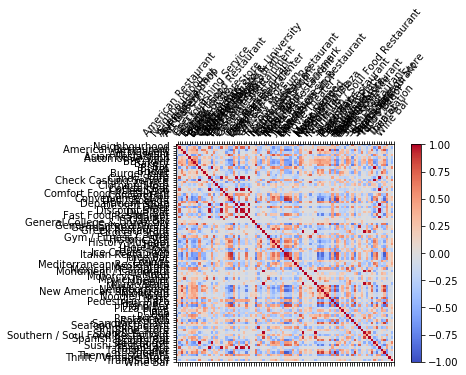

In [21]:
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(sa_grouped.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=50)
ax.set_yticks(ticks)
ax.set_xticklabels(sa_grouped.columns)
ax.set_yticklabels(sa_grouped.columns)
plt.show()

In [22]:
num_top_venues = 3

for hood in sa_grouped['Neighbourhood']:
    print("----"+hood+"----")
    temp = sa_grouped[sa_grouped['Neighbourhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----0.0 BEGIN----
                venue  freq
0               Hotel  0.15
1  Mexican Restaurant  0.08
2                 Bar  0.07


----131st District Court----
                venue  freq
0               Hotel  0.18
1  Mexican Restaurant  0.07
2        Cocktail Bar  0.06


----144th District Court of Bexar County----
                venue  freq
0               Hotel  0.14
1  Mexican Restaurant  0.09
2        Cocktail Bar  0.05


----150th District Court----
                venue  freq
0               Hotel  0.18
1  Mexican Restaurant  0.07
2        Cocktail Bar  0.06


----166th District Court----
                venue  freq
0               Hotel  0.17
1  Mexican Restaurant  0.08
2        Cocktail Bar  0.06


----186th District Court----
                venue  freq
0               Hotel  0.15
1  Mexican Restaurant  0.09
2          Steakhouse  0.05


----187th District Court----
                 venue  freq
0                Hotel  0.19
1   Mexican Restaurant  0.09
2  American Restauran

In [23]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [24]:
num_top_venues = 20

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighbourhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighbourhoods_venues_sorted = pd.DataFrame(columns=columns)
neighbourhoods_venues_sorted['Neighbourhood'] = sa_grouped['Neighbourhood']

for ind in np.arange(sa_grouped.shape[0]):
    neighbourhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(sa_grouped.iloc[ind, :], num_top_venues)

neighbourhoods_venues_sorted

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,...,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue,16th Most Common Venue,17th Most Common Venue,18th Most Common Venue,19th Most Common Venue,20th Most Common Venue
0,0.0 BEGIN,Hotel,Mexican Restaurant,Bar,Cocktail Bar,Seafood Restaurant,Theater,Steakhouse,American Restaurant,BBQ Joint,...,Ice Cream Shop,Burger Joint,New American Restaurant,Restaurant,Italian Restaurant,Wine Bar,History Museum,Monument / Landmark,Men's Store,Mediterranean Restaurant
1,131st District Court,Hotel,Mexican Restaurant,Cocktail Bar,Steakhouse,American Restaurant,Bar,Theater,Seafood Restaurant,Coffee Shop,...,BBQ Joint,Burger Joint,Ice Cream Shop,Pizza Place,Plaza,Italian Restaurant,Wine Bar,Hotel Bar,Men's Store,Mediterranean Restaurant
2,144th District Court of Bexar County,Hotel,Mexican Restaurant,Steakhouse,Cocktail Bar,Seafood Restaurant,American Restaurant,Bar,Sandwich Place,Coffee Shop,...,Ice Cream Shop,Burger Joint,Restaurant,New American Restaurant,Pizza Place,Pub,BBQ Joint,Italian Restaurant,Wine Bar,Bridge
3,150th District Court,Hotel,Mexican Restaurant,Cocktail Bar,Steakhouse,American Restaurant,Seafood Restaurant,Theater,Bar,Coffee Shop,...,Sandwich Place,BBQ Joint,Burger Joint,Pizza Place,Plaza,Italian Restaurant,Wine Bar,Sushi Restaurant,Café,Men's Store
4,166th District Court,Hotel,Mexican Restaurant,Cocktail Bar,Steakhouse,American Restaurant,Seafood Restaurant,Theater,Bar,Coffee Shop,...,Sandwich Place,BBQ Joint,Burger Joint,Pizza Place,Plaza,Italian Restaurant,Wine Bar,Theme Restaurant,German Restaurant,Greek Restaurant
5,186th District Court,Hotel,Mexican Restaurant,Cocktail Bar,Steakhouse,Bar,Seafood Restaurant,American Restaurant,BBQ Joint,Theater,...,Ice Cream Shop,Restaurant,Burger Joint,New American Restaurant,Pizza Place,Pub,Italian Restaurant,Sandwich Place,Wine Bar,Bistro
6,187th District Court,Hotel,Mexican Restaurant,American Restaurant,Pizza Place,Cocktail Bar,Theater,Coffee Shop,Sandwich Place,Plaza,...,Steakhouse,Ice Cream Shop,Taco Place,Seafood Restaurant,Grocery Store,History Museum,Mediterranean Restaurant,Lounge,Hotel Bar,Juice Bar
7,222 Main Plaza - Law Office,Hotel,Mexican Restaurant,Cocktail Bar,Steakhouse,American Restaurant,Seafood Restaurant,Theater,Bar,Coffee Shop,...,Sandwich Place,BBQ Joint,Burger Joint,Plaza,Italian Restaurant,Wine Bar,Convenience Store,Shoe Store,Hotel Bar,Spanish Restaurant
8,226th District Court,Hotel,Mexican Restaurant,Cocktail Bar,Steakhouse,Seafood Restaurant,American Restaurant,Sandwich Place,Bar,Theater,...,Ice Cream Shop,BBQ Joint,Burger Joint,New American Restaurant,Pizza Place,Pub,Italian Restaurant,Wine Bar,Theme Restaurant,Hotel Bar
9,227th District Court,Hotel,Mexican Restaurant,Cocktail Bar,American Restaurant,Seafood Restaurant,Bar,Steakhouse,Sandwich Place,Theater,...,Ice Cream Shop,Pizza Place,BBQ Joint,Burger Joint,Italian Restaurant,Wine Bar,Bakery,Hotel Bar,Sushi Restaurant,Spanish Restaurant


In [34]:
from sklearn.cluster import KMeans
import sklearn.cluster as cluster
import matplotlib.pyplot as plt
import sklearn.cluster as cluster
from scipy.spatial.distance import cdist
from sklearn.metrics import silhouette_samples, silhouette_score

In [29]:
# set number of clusters
#kclusters = 6

sa_grouped_clustering = sa_grouped.drop('Neighbourhood', 1)

# run k-means clustering
#kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(sa_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([1, 2, 5, 2, 2, 5, 0, 2, 5, 5])

In [30]:
distortions = []
K = range(1,8)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(sa_grouped_clustering)
    kmeanModel.fit(sa_grouped_clustering)
    distortions.append(sum(np.min(cdist(sa_grouped_clustering, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / sa_grouped_clustering.shape[0])

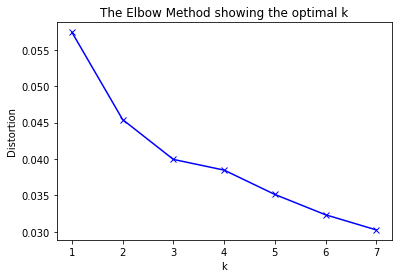

In [31]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

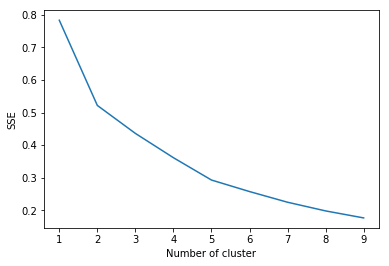

In [32]:
sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(sa_grouped_clustering)
    sa_grouped_clustering["clusters"] = kmeans.labels_
    #print(data["clusters"])
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [35]:
# Calculate Silhoutte score
range_n_clusters = list (range(2,11))
for n_clusters in range_n_clusters:
    clusterer = KMeans (n_clusters=n_clusters)
    preds = clusterer.fit_predict(sa_grouped_clustering)
    centers = clusterer.cluster_centers_

    score = silhouette_score (sa_grouped_clustering, preds, metric='euclidean')
    print ("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.6752533954360936)
For n_clusters = 3, silhouette score is 0.7336143779418708)
For n_clusters = 4, silhouette score is 0.7245632847417416)
For n_clusters = 5, silhouette score is 0.8293395337111378)
For n_clusters = 6, silhouette score is 0.8876061456318866)
For n_clusters = 7, silhouette score is 0.9509555595424382)
For n_clusters = 8, silhouette score is 0.9499255344196755)
For n_clusters = 9, silhouette score is 0.9504695769449243)
For n_clusters = 10, silhouette score is 0.7850681198648621)


In [36]:
from sklearn.cluster import DBSCAN 
from sklearn.datasets.samples_generator import make_blobs 
from sklearn.preprocessing import StandardScaler 

In [37]:
epsilon = 0.3
minimumSamples = 7
db = DBSCAN(eps=epsilon, min_samples=minimumSamples).fit(sa_grouped_clustering)
labels = db.labels_
labels

array([ 0,  1,  2,  1,  1,  2,  3,  1,  2,  2,  4,  3,  1,  3,  5,  2,  5,
        6,  0,  0,  0,  6,  0,  0,  3,  6,  0,  1,  6,  0,  1,  3,  4,  4,
        4,  4,  5,  2,  3,  5,  2,  2,  4,  0,  6, -1,  2,  0,  0,  4,  6,
        0,  4,  4,  4,  3,  2,  6,  2,  3,  1,  2,  4,  2,  4,  1,  3,  0,
        1,  0,  0,  2,  6,  0,  4,  0,  0,  5,  2,  0,  0,  0,  0,  3,  3,
       -1,  2,  3,  5,  5,  5,  3,  0,  0,  1,  2,  0,  2,  5,  2,  2,  4,
        4,  4,  0,  2,  2,  2,  2,  2,  3,  4,  3,  2,  0,  0,  0,  1,  0,
        3,  6,  2,  0,  0,  2,  0,  0,  4,  0,  6,  6,  0,  1,  2,  2,  2,
        5,  5,  2,  4,  4,  2,  5,  4,  2,  2,  6,  0,  2,  0,  6,  2,  0,
        3,  6,  3,  0,  2,  1,  6,  0,  0,  2,  5,  2,  2,  1,  2,  1,  0,
        0,  0,  2,  0,  3,  2,  6,  6,  4,  0,  0,  6,  3,  0,  3,  5,  1,
        2,  0,  0,  1,  1,  2,  6,  2,  0,  2], dtype=int64)

In [38]:
# First, create an array of booleans using the labels from db.
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
core_samples_mask

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [39]:
# Remove repetition in labels by turning it into a set.
unique_labels = set(labels)
unique_labels

{-1, 0, 1, 2, 3, 4, 5, 6}

In [40]:
import pylab
import scipy.cluster.hierarchy
from sklearn.cluster import AgglomerativeClustering 


In [41]:
agglom = AgglomerativeClustering(n_clusters = 6, linkage = 'complete')
agglom.fit(sa_grouped_clustering)
agglom.labels_

array([1, 1, 4, 1, 1, 4, 0, 1, 4, 4, 2, 0, 1, 0, 3, 4, 3, 2, 1, 1, 1, 2, 1,
       1, 0, 2, 1, 1, 2, 1, 1, 0, 2, 2, 2, 2, 3, 4, 0, 3, 4, 4, 2, 1, 2, 5,
       4, 1, 1, 2, 2, 1, 2, 2, 2, 0, 4, 2, 4, 0, 1, 4, 2, 4, 2, 1, 0, 1, 1,
       1, 1, 4, 2, 1, 2, 1, 1, 3, 4, 1, 1, 1, 1, 0, 0, 0, 4, 0, 3, 3, 3, 0,
       1, 1, 1, 4, 1, 4, 3, 4, 4, 2, 2, 2, 1, 4, 4, 4, 4, 4, 0, 2, 0, 4, 1,
       1, 1, 1, 1, 0, 2, 4, 1, 1, 4, 1, 1, 2, 1, 2, 2, 1, 1, 4, 4, 4, 3, 3,
       4, 2, 2, 4, 3, 2, 4, 4, 2, 1, 4, 1, 2, 4, 1, 0, 2, 0, 1, 4, 1, 2, 1,
       1, 4, 3, 4, 4, 1, 4, 1, 1, 1, 1, 4, 1, 0, 4, 2, 2, 2, 1, 1, 2, 0, 1,
       0, 3, 1, 4, 1, 1, 1, 1, 4, 2, 4, 1, 4], dtype=int64)

In [42]:
sa_merged = dataframe_filtered

# add clustering labels
sa_merged['Cluster Labels'] = db.labels_

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
sa_merged = sa_merged.join(neighbourhoods_venues_sorted.set_index('Neighbourhood'), on='name')

sa_merged.head() # check the last columns!

,name,categories,address,cc,city,country,crossStreet,formattedAddress,labeledLatLngs,lat,...,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue,16th Most Common Venue,17th Most Common Venue,18th Most Common Venue,19th Most Common Venue,20th Most Common Venue
0,San Fernando Cathedral,Church,115 W Main Plz,US,San Antonio,United States,NaN,"[115 W Main Plz, San Antonio, TX 78205, United...","[{'label': 'display', 'lat': 29.42445959712935...",29.424460,...,Ice Cream Shop,BBQ Joint,Burger Joint,New American Restaurant,Pizza Place,Pub,Italian Restaurant,Wine Bar,Bakery,Church
1,Bexar County Courthouse,Courthouse,100 Dolorosa,US,San Antonio,United States,NaN,"[100 Dolorosa, San Antonio, TX 78205, United S...","[{'label': 'display', 'lat': 29.42321234496511...",29.423212,...,BBQ Joint,Theater,Plaza,Ice Cream Shop,Burger Joint,Greek Restaurant,Mediterranean Restaurant,Lounge,Juice Bar,Hotel Bar
2,County Court 8 of Bexar County TX,Courthouse,NaN,US,San Antonio,United States,NaN,"[San Antonio, TX, United States]","[{'label': 'display', 'lat': 29.42414414786921...",29.424144,...,Ice Cream Shop,BBQ Joint,Burger Joint,New American Restaurant,Pizza Place,Italian Restaurant,Wine Bar,Thrift / Vintage Store,Greek Restaurant,Convenience Store
3,Main Plaza Park,Plaza,100 W Main Plz,US,San Antonio,United States,btwn E Commerce St & W Market/Dolorosa,[100 W Main Plz (btwn E Commerce St & W Market...,"[{'label': 'display', 'lat': 29.42458767477948...",29.424588,...,Coffee Shop,Ice Cream Shop,Burger Joint,New American Restaurant,Pizza Place,Restaurant,Italian Restaurant,Wine Bar,Theme Restaurant,Dessert Shop
4,Main Plaza Farmer's Market,General Entertainment,NaN,US,San Antonio,United States,NaN,"[San Antonio, TX 78205, United States]","[{'label': 'display', 'lat': 29.42475970408229...",29.424760,...,Ice Cream Shop,Burger Joint,Restaurant,BBQ Joint,New American Restaurant,Pizza Place,Pub,Italian Restaurant,Wine Bar,Theme Restaurant


In [56]:
sa_merged.loc[sa_merged['Cluster Labels'] == -1, sa_merged.columns[[1] + list(range(5, sa_merged.shape[1]))]]

,categories,country,crossStreet,formattedAddress,labeledLatLngs,lat,lng,postalCode,state,id,...,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue,16th Most Common Venue,17th Most Common Venue,18th Most Common Venue,19th Most Common Venue,20th Most Common Venue
45,General Travel,United States,at W Market St,"[203 S Saint Marys St (at W Market St), San An...","[{'label': 'display', 'lat': 29.42375654213593...",29.423757,-98.492119,78205,TX,4b2f9b47f964a520eeec24e3,...,Coffee Shop,Restaurant,Burger Joint,New American Restaurant,Plaza,Pub,Italian Restaurant,Wine Bar,Hotel Bar,Monument / Landmark
85,Gift Shop,United States,NaN,"[141 E Commerce St, San Antonio, TX 78205, Uni...","[{'label': 'display', 'lat': 29.4243638465442,...",29.424364,-98.492129,78205,TX,4dbdcb6f1e72b351cad345dc,...,Coffee Shop,Restaurant,Burger Joint,New American Restaurant,Plaza,Pub,Italian Restaurant,Wine Bar,Sports Bar,Monument / Landmark


In [58]:
cluster=sa_merged.loc[sa_merged['Cluster Labels'] == -1, sa_merged.columns[[1] + list(range(5, sa_merged.shape[1]))]]

In [59]:
cluster.shape

(2, 31)

In [60]:
from pandas import DataFrame

In [61]:
export_csv = cluster.to_csv (r'C:\Users\sudha27\export_dataframe.csv', index = None, header=True) #Don't forget to add '.csv' at the end of the path


In [62]:
sa_merged.loc[sa_merged['Cluster Labels'] == 0, sa_merged.columns[[1] + list(range(5, sa_merged.shape[1]))]]

,categories,country,crossStreet,formattedAddress,labeledLatLngs,lat,lng,postalCode,state,id,...,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue,16th Most Common Venue,17th Most Common Venue,18th Most Common Venue,19th Most Common Venue,20th Most Common Venue
0,Church,United States,NaN,"[115 W Main Plz, San Antonio, TX 78205, United...","[{'label': 'display', 'lat': 29.42445959712935...",29.424460,-98.493613,78205,TX,4ad4bffef964a520f3ea20e3,...,Ice Cream Shop,BBQ Joint,Burger Joint,New American Restaurant,Pizza Place,Pub,Italian Restaurant,Wine Bar,Bakery,Church
18,Mexican Restaurant,United States,W. Commerce,"[100 N Main Ave Ste 100 (W. Commerce), San Ant...","[{'label': 'display', 'lat': 29.42417416151267...",29.424174,-98.494388,78205,TX,4d18dfb1401db60c3523f6a4,...,BBQ Joint,Seafood Restaurant,Ice Cream Shop,Taco Place,Plaza,Bridge,History Museum,Mediterranean Restaurant,Lounge,Lawyer
19,Government Building,United States,NaN,"[180 Military Plaza, San Antonio, TX 78205, Un...","[{'label': 'display', 'lat': 29.42497264343159...",29.424973,-98.493947,78205,TX,4c113fa0d41e76b04014310d,...,Pizza Place,BBQ Joint,Ice Cream Shop,New American Restaurant,Italian Restaurant,Wine Bar,Church,Bridge,Burger Joint,Discount Store
20,Pizza Place,United States,NaN,"[100 Villica St.,, San Antonio, TX 78205, Unit...","[{'label': 'display', 'lat': 29.42394202277379...",29.423942,-98.493186,78205,TX,533e0a13498e5f9f999b8b86,...,Ice Cream Shop,Restaurant,Burger Joint,New American Restaurant,Pizza Place,Plaza,Italian Restaurant,Sandwich Place,Wine Bar,Convenience Store
22,Event Space,United States,NaN,"[Texas, United States]","[{'label': 'display', 'lat': 29.424621, 'lng':...",29.424621,-98.493672,NaN,Texas,4ba7aceef964a520b2a839e3,...,Ice Cream Shop,BBQ Joint,Burger Joint,New American Restaurant,Pizza Place,Restaurant,Italian Restaurant,Wine Bar,Bakery,Greek Restaurant
23,Convenience Store,United States,NaN,"[126 E Main Plz Ste B, San Antonio, TX 78205, ...","[{'label': 'display', 'lat': 29.42448294303111...",29.424483,-98.493269,78205,TX,4b4a44f2f964a520998126e3,...,Coffee Shop,Ice Cream Shop,Burger Joint,New American Restaurant,Pizza Place,Restaurant,Italian Restaurant,Wine Bar,Bakery,Convenience Store
26,Music Venue,United States,NaN,"[San Antonio, TX, United States]","[{'label': 'display', 'lat': 29.4241219, 'lng'...",29.424122,-98.493628,NaN,TX,56c18088498e8d3a16894dc7,...,Ice Cream Shop,BBQ Joint,Burger Joint,Pizza Place,Italian Restaurant,Wine Bar,Bakery,Greek Restaurant,Convenience Store,Shoe Store
29,Shoe Store,United States,NaN,"[100 Soledad St Ste 100, San Antonio, TX 78205...","[{'label': 'display', 'lat': 29.42472914480139...",29.424729,-98.492594,78205,TX,4c7e7d170b2a9eb05c7c651f,...,Ice Cream Shop,Sandwich Place,Burger Joint,New American Restaurant,Plaza,Restaurant,Italian Restaurant,Wine Bar,Bakery,Dessert Shop
43,City Hall,United States,Flores St,"[100 Military Plz (Flores St), San Antonio, TX...",NaN,29.424652,-98.494872,78205,TX,4c410bdfe26920a1c2f05de7,...,Taco Place,Seafood Restaurant,Plaza,BBQ Joint,Burger Joint,History Museum,Mediterranean Restaurant,Lounge,Lawyer,Juice Bar
47,Convenience Store,United States,NaN,"[201 W Commerce St, San Antonio, TX 78205, Uni...","[{'label': 'display', 'lat': 29.4252879, 'lng'...",29.425288,-98.494709,78205,TX,5480e70d498eb87fb60a7105,...,Taco Place,Seafood Restaurant,Plaza,Bridge,History Museum,Mediterranean Restaurant,Lounge,Lawyer,Juice Bar,Ice Cream Shop


In [63]:
cluster0=sa_merged.loc[sa_merged['Cluster Labels'] == 0, sa_merged.columns[[1] + list(range(5, sa_merged.shape[1]))]]

In [65]:
export_csv = cluster0.to_csv (r'C:\Users\sudha27\cluster0.csv', index = None, header=True) #Don't forget to add '.csv' at the end of the path

In [66]:
sa_merged.loc[sa_merged['Cluster Labels'] == 1, sa_merged.columns[[1] + list(range(5, sa_merged.shape[1]))]]

,categories,country,crossStreet,formattedAddress,labeledLatLngs,lat,lng,postalCode,state,id,...,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue,16th Most Common Venue,17th Most Common Venue,18th Most Common Venue,19th Most Common Venue,20th Most Common Venue
1,Courthouse,United States,NaN,"[100 Dolorosa, San Antonio, TX 78205, United S...","[{'label': 'display', 'lat': 29.42321234496511...",29.423212,-98.493719,78205,TX,4bb08897f964a520464a3ce3,...,BBQ Joint,Theater,Plaza,Ice Cream Shop,Burger Joint,Greek Restaurant,Mediterranean Restaurant,Lounge,Juice Bar,Hotel Bar
3,Plaza,United States,btwn E Commerce St & W Market/Dolorosa,[100 W Main Plz (btwn E Commerce St & W Market...,"[{'label': 'display', 'lat': 29.42458767477948...",29.424588,-98.493285,78205,TX,4bbe1906b42aef3b97664bc3,...,Coffee Shop,Ice Cream Shop,Burger Joint,New American Restaurant,Pizza Place,Restaurant,Italian Restaurant,Wine Bar,Theme Restaurant,Dessert Shop
4,General Entertainment,United States,NaN,"[San Antonio, TX 78205, United States]","[{'label': 'display', 'lat': 29.42475970408229...",29.424760,-98.493585,78205,TX,50b4feace4b0818e9afd0b96,...,Ice Cream Shop,Burger Joint,Restaurant,BBQ Joint,New American Restaurant,Pizza Place,Pub,Italian Restaurant,Wine Bar,Theme Restaurant
7,Wine Bar,United States,at Navarro St,"[214 W Crockett St (at Navarro St), San Antoni...","[{'label': 'display', 'lat': 29.42496387179004...",29.424964,-98.490272,78205,TX,4b8556eef964a520ab5731e3,...,Historic Site,Plaza,Coffee Shop,Sandwich Place,Dessert Shop,Pub,Museum,BBQ Joint,Burger Joint,Movie Theater
12,Beer Garden,United States,NaN,"[San Antonio, TX 78205, United States]","[{'label': 'display', 'lat': 29.42412130408513...",29.424121,-98.493628,78205,TX,5027305fe4b0b57d7202a1a2,...,Ice Cream Shop,BBQ Joint,Burger Joint,Pizza Place,Italian Restaurant,Wine Bar,Bakery,Greek Restaurant,Convenience Store,Shoe Store
27,Food Truck,United States,NaN,"[San Antonio, TX 78205, United States]","[{'label': 'display', 'lat': 29.424122, 'lng':...",29.424122,-98.493628,78205,TX,4f2463bce4b0e120819d86ae,...,Ice Cream Shop,BBQ Joint,Burger Joint,Pizza Place,Italian Restaurant,Wine Bar,Bakery,Greek Restaurant,Convenience Store,Shoe Store
30,Other Great Outdoors,United States,NaN,"[San Antonio, TX 78205, United States]","[{'label': 'display', 'lat': 29.42448858061723...",29.424489,-98.491533,78205,TX,4f8c8f8de4b0e5ed775b2336,...,Plaza,American Restaurant,BBQ Joint,Historic Site,Museum,Sandwich Place,Restaurant,Pub,Dessert Shop,Men's Store
60,Art Gallery,United States,NaN,"[502 Villita Street, San Antonio, TX 78205, Un...","[{'label': 'display', 'lat': 29.42289007143900...",29.422890,-98.492453,78205,TX,4e8ca70ff5b91e225592722f,...,Pub,Plaza,Sandwich Place,Italian Restaurant,Shipping Store,Convenience Store,Ice Cream Shop,Hotel Bar,Sushi Restaurant,History Museum
65,None,United States,NaN,"[San Antonio, TX, United States]","[{'label': 'display', 'lat': 29.4241219, 'lng'...",29.424122,-98.493628,NaN,TX,53f450bb498e2997515fa26b,...,Ice Cream Shop,BBQ Joint,Burger Joint,Pizza Place,Italian Restaurant,Wine Bar,Bakery,Greek Restaurant,Convenience Store,Shoe Store
68,Bus Line,United States,NaN,"[408 Dolorosa, San Antonio, TX 78204, United S...","[{'label': 'display', 'lat': 29.42428380507673...",29.424284,-98.493462,78204,TX,4e66da7b483bef6eb7b6af26,...,Ice Cream Shop,Burger Joint,Restaurant,New American Restaurant,Pizza Place,Pub,BBQ Joint,Italian Restaurant,Wine Bar,Bridge


In [67]:
cluster1=sa_merged.loc[sa_merged['Cluster Labels'] == 1, sa_merged.columns[[1] + list(range(5, sa_merged.shape[1]))]]

In [68]:
export_csv = cluster1.to_csv (r'C:\Users\sudha27\cluster1.csv', index = None, header=True)

In [69]:
sa_merged.loc[sa_merged['Cluster Labels'] == 2, sa_merged.columns[[1] + list(range(5, sa_merged.shape[1]))]]

,categories,country,crossStreet,formattedAddress,labeledLatLngs,lat,lng,postalCode,state,id,...,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue,16th Most Common Venue,17th Most Common Venue,18th Most Common Venue,19th Most Common Venue,20th Most Common Venue
2,Courthouse,United States,NaN,"[San Antonio, TX, United States]","[{'label': 'display', 'lat': 29.42414414786921...",29.424144,-98.493591,NaN,TX,4e26f07fa809510950dbdc92,...,Ice Cream Shop,BBQ Joint,Burger Joint,New American Restaurant,Pizza Place,Italian Restaurant,Wine Bar,Thrift / Vintage Store,Greek Restaurant,Convenience Store
5,Courthouse,United States,Dwyer,"[300 Dolorosa (Dwyer), San Antonio, TX 78205, ...","[{'label': 'display', 'lat': 29.4243144745312,...",29.424314,-98.493832,78205,TX,4c814f67dc018cfabf7ec46c,...,Ice Cream Shop,Pizza Place,BBQ Joint,Burger Joint,Italian Restaurant,Wine Bar,Bakery,Hotel Bar,Sushi Restaurant,Spanish Restaurant
8,Theater,United States,NaN,"[208 E Houston St, San Antonio, TX 78205, Unit...","[{'label': 'display', 'lat': 29.42598141664784...",29.425981,-98.491150,78205,TX,4c40ccbbe26920a18d795de7,...,Historic Site,Coffee Shop,Sandwich Place,Dessert Shop,Museum,Restaurant,Pub,Plaza,BBQ Joint,Bakery
9,Food Truck,United States,NaN,"[San Antonio, TX, United States]","[{'label': 'display', 'lat': 29.424185, 'lng':...",29.424185,-98.493505,NaN,TX,54320e11498eec43385d369b,...,Ice Cream Shop,BBQ Joint,Burger Joint,New American Restaurant,Pizza Place,Pub,Italian Restaurant,Wine Bar,Bakery,Church
15,Government Building,United States,NaN,"[San Antonio, TX, United States]","[{'label': 'display', 'lat': 29.4241219, 'lng'...",29.424122,-98.493628,NaN,TX,56f39999498e79a0ac142e83,...,Ice Cream Shop,BBQ Joint,Burger Joint,Pizza Place,Italian Restaurant,Wine Bar,Bakery,Greek Restaurant,Convenience Store,Shoe Store
37,Hotel Bar,United States,Commerce,"[Drury Plaza Hotels (Commerce), San Antonio, T...","[{'label': 'display', 'lat': 29.42410214414177...",29.424102,-98.491806,78205,TX,502ada55e4b02d4e93096ee9,...,Coffee Shop,Restaurant,Burger Joint,New American Restaurant,Plaza,Pub,Italian Restaurant,Sandwich Place,Wine Bar,Historic Site
40,Sandwich Place,United States,Commerce,"[105 Soledad (Commerce), San Antonio, TX 78215...","[{'label': 'display', 'lat': 29.42500012876436...",29.425000,-98.493245,78215,TX,4ec5500177c8d6951130e8df,...,Ice Cream Shop,Sandwich Place,Burger Joint,New American Restaurant,Pizza Place,Restaurant,Italian Restaurant,Rock Club,Monument / Landmark,Mediterranean Restaurant
41,Courthouse,United States,NaN,"[300 Dolorosa, San Antonio, TX 78205, United S...","[{'label': 'display', 'lat': 29.42397, 'lng': ...",29.423970,-98.493395,78205,TX,4c8e47754e95236a68857aca,...,Ice Cream Shop,BBQ Joint,Burger Joint,New American Restaurant,Pizza Place,Pub,Italian Restaurant,Wine Bar,Theme Restaurant,Hotel Bar
46,Parking,United States,Soledad St.,"[Soledad St., San Antonio, TX 78205, United St...","[{'label': 'display', 'lat': 29.425276, 'lng':...",29.425276,-98.493385,78205,TX,5ac270b4b2958f0820ce6ad7,...,Coffee Shop,Burger Joint,Ice Cream Shop,New American Restaurant,Pizza Place,Restaurant,Italian Restaurant,Rock Club,Monument / Landmark,Mediterranean Restaurant
56,None,United States,NaN,"[Texas, United States]","[{'label': 'display', 'lat': 29.42339382922043...",29.423394,-98.493392,NaN,Texas,4d261a703c84b1f778da0847,...,Sandwich Place,BBQ Joint,Burger Joint,Pizza Place,Plaza,Italian Restaurant,Wine Bar,Theme Restaurant,German Restaurant,Greek Restaurant


In [70]:
cluster2=sa_merged.loc[sa_merged['Cluster Labels'] == 2, sa_merged.columns[[1] + list(range(5, sa_merged.shape[1]))]]

In [71]:
export_csv = cluster2.to_csv (r'C:\Users\sudha27\cluster2.csv', index = None, header=True)

In [72]:
sa_merged.loc[sa_merged['Cluster Labels'] == 3, sa_merged.columns[[1] + list(range(5, sa_merged.shape[1]))]]

,categories,country,crossStreet,formattedAddress,labeledLatLngs,lat,lng,postalCode,state,id,...,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue,16th Most Common Venue,17th Most Common Venue,18th Most Common Venue,19th Most Common Venue,20th Most Common Venue
6,Historic Site,United States,NaN,"[300 Dolorosa, San Antonio, TX 78205, United S...","[{'label': 'display', 'lat': 29.42394637933925...",29.423946,-98.493473,78205,TX,4e1b2a241495517ce518b66b,...,Ice Cream Shop,BBQ Joint,Burger Joint,Pizza Place,Italian Restaurant,Wine Bar,Taco Place,Bridge,Men's Store,Mediterranean Restaurant
11,Taco Place,United States,NaN,"[130 E Main Plz, San Antonio, TX 78205, United...","[{'label': 'display', 'lat': 29.42406643926385...",29.424066,-98.493246,78205,TX,4c6016b4924b76b0568bebb9,...,Ice Cream Shop,Restaurant,Burger Joint,New American Restaurant,Pizza Place,Plaza,Italian Restaurant,Sandwich Place,Wine Bar,Sushi Restaurant
13,Bus Line,United States,S. Main,"[Dolorosa (S. Main), San Antonio, TX 78205, Un...","[{'label': 'display', 'lat': 29.42400459154652...",29.424005,-98.494044,78205,TX,4f9325b5e4b03c10533c9de3,...,Coffee Shop,BBQ Joint,Burger Joint,Ice Cream Shop,Italian Restaurant,Gym / Fitness Center,Men's Store,Lounge,Juice Bar,Spanish Restaurant
24,Music Venue,United States,NaN,"[San Antonio, TX, United States]","[{'label': 'display', 'lat': 29.42412, 'lng': ...",29.424120,-98.493630,NaN,TX,576f8737498eb5f8a0380b6f,...,Ice Cream Shop,BBQ Joint,Burger Joint,Pizza Place,Italian Restaurant,Wine Bar,Bakery,Greek Restaurant,Convenience Store,Shoe Store
31,Cocktail Bar,United States,NaN,"[155 E Commercial Street, San Antonio, TX, Uni...","[{'label': 'display', 'lat': 29.42415491064569...",29.424155,-98.493543,NaN,TX,51c7a808498e4ffa35ff51b5,...,Ice Cream Shop,BBQ Joint,Burger Joint,New American Restaurant,Pizza Place,Italian Restaurant,Wine Bar,Thrift / Vintage Store,Greek Restaurant,Convenience Store
38,Courthouse,United States,NaN,"[300 Dolorosa Fl 3, San Antonio, TX 78205, Uni...","[{'label': 'display', 'lat': 29.42439543772014...",29.424395,-98.493441,78205,TX,4dc064764df0f8fd6b9bdbda,...,Ice Cream Shop,Burger Joint,Restaurant,New American Restaurant,Pizza Place,Pub,BBQ Joint,Italian Restaurant,Wine Bar,Bridge
55,Event Space,United States,NaN,"[126 E Main Plz, San Antonio, TX 78205, United...","[{'label': 'display', 'lat': 29.42339652492485...",29.423397,-98.492910,78205,TX,562be41b498e522c283325a0,...,Ice Cream Shop,Burger Joint,Plaza,Pub,Sandwich Place,Italian Restaurant,Wine Bar,Bakery,Convenience Store,Hotel Bar
59,Wine Shop,United States,NaN,"[San Antonio, TX, United States]","[{'label': 'display', 'lat': 29.42491634925274...",29.424916,-98.491913,NaN,TX,4dc0d5e5fa764d03e9f12d26,...,BBQ Joint,Plaza,New American Restaurant,Pub,Restaurant,Sandwich Place,Monument / Landmark,Historic Site,Men's Store,Mediterranean Restaurant
66,Cocktail Bar,United States,NaN,"[San Antonio, TX, United States]","[{'label': 'display', 'lat': 29.423369, 'lng':...",29.423369,-98.493147,NaN,TX,58ba246e25911e01e73b8103,...,Sandwich Place,BBQ Joint,Burger Joint,Pizza Place,Plaza,Pub,Italian Restaurant,Wine Bar,Convenience Store,Hotel Bar
83,Building,United States,NaN,"[203 S Saint Marys St, San Antonio, TX 78205, ...","[{'label': 'display', 'lat': 29.42379751463549...",29.423798,-98.492110,78205,TX,4b6d883bf964a520b47a2ce3,...,Coffee Shop,Restaurant,Burger Joint,New American Restaurant,Plaza,Pub,Italian Restaurant,Wine Bar,Hotel Bar,Monument / Landmark


In [73]:
cluster3=sa_merged.loc[sa_merged['Cluster Labels'] == 3, sa_merged.columns[[1] + list(range(5, sa_merged.shape[1]))]]

In [74]:
export_csv = cluster3.to_csv (r'C:\Users\sudha27\cluster3.csv', index = None, header=True)

In [75]:
sa_merged.loc[sa_merged['Cluster Labels'] == 4, sa_merged.columns[[1] + list(range(5, sa_merged.shape[1]))]]

,categories,country,crossStreet,formattedAddress,labeledLatLngs,lat,lng,postalCode,state,id,...,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue,16th Most Common Venue,17th Most Common Venue,18th Most Common Venue,19th Most Common Venue,20th Most Common Venue
10,Food Truck,United States,NaN,"[San Antonio, TX 78205, United States]","[{'label': 'display', 'lat': 29.42434895258670...",29.424349,-98.493939,78205,TX,504799e5e4b0aa9a70b2a79a,...,Ice Cream Shop,Pizza Place,BBQ Joint,Burger Joint,Italian Restaurant,Wine Bar,Bakery,Hotel Bar,Sushi Restaurant,Spanish Restaurant
32,Ice Cream Shop,United States,Market St,"[126 E Main Plz Unit 100 (Market St), San Anto...","[{'label': 'display', 'lat': 29.424123, 'lng':...",29.424123,-98.492809,78205,TX,59921e77fd16bb1b84a39506,...,Ice Cream Shop,Sandwich Place,Burger Joint,New American Restaurant,Plaza,Restaurant,Italian Restaurant,Wine Bar,Bistro,Dessert Shop
33,Food & Drink Shop,United States,Dolorosa & mail,"[Dolorosa & mail, San Antonio, TX, United States]","[{'label': 'display', 'lat': 29.42398846149444...",29.423988,-98.494542,NaN,TX,4d5aef6cf116b60c4f692514,...,Taco Place,BBQ Joint,Seafood Restaurant,Ice Cream Shop,Plaza,Greek Restaurant,Mediterranean Restaurant,Lounge,Lawyer,Juice Bar
34,Bank,United States,NaN,"[San Antonio, TX, United States]","[{'label': 'display', 'lat': 29.42414264553388...",29.424143,-98.492948,NaN,TX,4dc82e9dae6031fcb0058b25,...,Ice Cream Shop,Sandwich Place,Burger Joint,New American Restaurant,Plaza,Restaurant,Italian Restaurant,Wine Bar,Bistro,Discount Store
35,Courthouse,United States,NaN,"[San Antonio, TX, United States]","[{'label': 'display', 'lat': 29.42432567332213...",29.424326,-98.493687,NaN,TX,4e9c324b722edf21e31dc68d,...,Ice Cream Shop,BBQ Joint,Burger Joint,New American Restaurant,Pizza Place,Italian Restaurant,Wine Bar,Thrift / Vintage Store,Greek Restaurant,Convenience Store
42,Pizza Place,United States,NaN,"[San Antonio, TX, United States]","[{'label': 'display', 'lat': 29.42386016851052...",29.423860,-98.494722,NaN,TX,54c92a94498e2a01f9c56af4,...,Seafood Restaurant,Ice Cream Shop,Steakhouse,Plaza,BBQ Joint,Bridge,History Museum,Mediterranean Restaurant,Lounge,Lawyer
49,Building,United States,NaN,"[111 Soledad St Ste 1800, San Antonio, TX 7820...","[{'label': 'display', 'lat': 29.42540066882483...",29.425401,-98.494052,78205,TX,4eb2a461f5b94483886c2f70,...,Pizza Place,Art Gallery,BBQ Joint,Ice Cream Shop,New American Restaurant,Italian Restaurant,Wine Bar,Music Store,Greek Restaurant,Convenience Store
52,Breakfast Spot,United States,NaN,"[108 Soledad St, San Antonio, TX 78205, United...","[{'label': 'display', 'lat': 29.42522362430468...",29.425224,-98.493023,78205,TX,4e983ae677c8d1cccba08258,...,Ice Cream Shop,Burger Joint,New American Restaurant,Restaurant,Sandwich Place,Italian Restaurant,Wine Bar,Bakery,Monument / Landmark,Bistro
53,Greek Restaurant,United States,Solo rosa,"[111 S Flores St (Solo rosa), San Antonio, TX ...","[{'label': 'display', 'lat': 29.42349128413609...",29.423491,-98.494784,78204,TX,500064d9e4b066e96e4f3a1b,...,Seafood Restaurant,BBQ Joint,Plaza,Lawyer,Juice Bar,Ice Cream Shop,Lounge,Hotel Pool,Hotel Bar,Mediterranean Restaurant
54,Greek Restaurant,United States,NaN,"[San Antonio, TX 78204, United States]","[{'label': 'display', 'lat': 29.423674, 'lng':...",29.423674,-98.494825,78204,TX,5bc4de61838e59002c2a3d97,...,Seafood Restaurant,Ice Cream Shop,Steakhouse,Plaza,BBQ Joint,Bridge,History Museum,Mediterranean Restaurant,Lounge,Lawyer


In [76]:
cluster4=sa_merged.loc[sa_merged['Cluster Labels'] == 4, sa_merged.columns[[1] + list(range(5, sa_merged.shape[1]))]]

In [77]:
export_csv = cluster4.to_csv (r'C:\Users\sudha27\cluster4.csv', index = None, header=True)

In [78]:
sa_merged.loc[sa_merged['Cluster Labels'] == 5, sa_merged.columns[[1] + list(range(5, sa_merged.shape[1]))]]

,categories,country,crossStreet,formattedAddress,labeledLatLngs,lat,lng,postalCode,state,id,...,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue,16th Most Common Venue,17th Most Common Venue,18th Most Common Venue,19th Most Common Venue,20th Most Common Venue
14,Cocktail Bar,United States,Main Plaza,"[100 Villita St (Main Plaza), San Antonio, TX ...","[{'label': 'display', 'lat': 29.423179, 'lng':...",29.423179,-98.493127,78205,TX,545fa715498e7ab0f046697f,...,Sandwich Place,BBQ Joint,Burger Joint,Pizza Place,Plaza,Italian Restaurant,Wine Bar,Bakery,Hotel Bar,Sushi Restaurant
16,Food Truck,United States,NaN,"[San Antonio, TX, United States]","[{'label': 'display', 'lat': 29.42431628046102...",29.424316,-98.493746,NaN,TX,51f163a5498e55458d5cc2e3,...,Ice Cream Shop,BBQ Joint,Burger Joint,New American Restaurant,Pizza Place,Italian Restaurant,Wine Bar,Thrift / Vintage Store,Sushi Restaurant,Hotel Bar
36,Food Court,United States,NaN,"[300 Dolorosa, San Antonio, TX 78205, United S...","[{'label': 'display', 'lat': 29.42319320459834...",29.423193,-98.494507,78205,TX,4c81394b2f1c236aabbd2d43,...,BBQ Joint,Steakhouse,Church,Bar,Mediterranean Restaurant,Lounge,Lawyer,Juice Bar,Automotive Shop,Hotel Pool
39,American Restaurant,United States,at Market St,"[203 S Saint Marys St (at Market St), San Anto...","[{'label': 'display', 'lat': 29.42352033752074...",29.423520,-98.492137,78205,TX,4b25bab3f964a520bd7524e3,...,Pub,New American Restaurant,Plaza,Restaurant,Sandwich Place,Italian Restaurant,Wine Bar,Ice Cream Shop,Motorcycle Shop,Café
77,Business Service,United States,NaN,"[203 S Saint Marys St #160, San Antonio, TX 78...","[{'label': 'display', 'lat': 29.423878, 'lng':...",29.423878,-98.492578,78205,TX,56b373ef498ea78eadf07b35,...,Ice Cream Shop,Restaurant,Burger Joint,New American Restaurant,Plaza,Pub,Italian Restaurant,Wine Bar,Bridge,Convenience Store
88,Government Building,United States,NaN,"[300 Dolorosa, San Antonio, TX 78205, United S...","[{'label': 'display', 'lat': 29.42323786718967...",29.423238,-98.494606,78205,TX,4b1e64eaf964a5207f1924e3,...,Seafood Restaurant,Steakhouse,Plaza,BBQ Joint,Bridge,History Museum,Mediterranean Restaurant,Lounge,Lawyer,Juice Bar
89,None,United States,NaN,"[111-199 S Main Plaza, San Antonio, TX 78205, ...","[{'label': 'display', 'lat': 29.42426347829488...",29.424263,-98.494561,78205,TX,4d827b78744ca143c06a6e54,...,Taco Place,BBQ Joint,Seafood Restaurant,Ice Cream Shop,Plaza,Greek Restaurant,Mediterranean Restaurant,Lounge,Lawyer,Juice Bar
90,Eye Doctor,United States,NaN,"[8910 Bandera Rd Ste 105, San Antonio, TX 7825...","[{'label': 'display', 'lat': 29.42391801681811...",29.423918,-98.493311,78250,TX,5ab133a44c954c18ca30331d,...,Sandwich Place,Burger Joint,Pub,New American Restaurant,Pizza Place,Plaza,BBQ Joint,Italian Restaurant,Restaurant,Mediterranean Restaurant
98,Mexican Restaurant,United States,NaN,"[San Antonio, TX, United States]","[{'label': 'display', 'lat': 29.422972, 'lng':...",29.422972,-98.492897,NaN,TX,531f48d6498edff11552f9f4,...,Sandwich Place,BBQ Joint,Men's Store,Mediterranean Restaurant,Ice Cream Shop,Hotel Bar,Art Gallery,History Museum,German Restaurant,Discount Store
136,Chinese Restaurant,United States,NaN,"[124 N Main Ave, San Antonio, TX 78205, United...","[{'label': 'display', 'lat': 29.4254, 'lng': -...",29.425400,-98.493739,78205,TX,4f32ad6019836c91c7eefb07,...,Restaurant,Burger Joint,Ice Cream Shop,New American Restaurant,Pizza Place,BBQ Joint,Art Gallery,Pub,Italian Restaurant,Resort


In [79]:
cluster5=sa_merged.loc[sa_merged['Cluster Labels'] == 5, sa_merged.columns[[1] + list(range(5, sa_merged.shape[1]))]]

In [80]:
export_csv = cluster5.to_csv (r'C:\Users\sudha27\cluster5.csv', index = None, header=True)

In [81]:
sa_merged.loc[sa_merged['Cluster Labels'] == 6, sa_merged.columns[[1] + list(range(5, sa_merged.shape[1]))]]

,categories,country,crossStreet,formattedAddress,labeledLatLngs,lat,lng,postalCode,state,id,...,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue,16th Most Common Venue,17th Most Common Venue,18th Most Common Venue,19th Most Common Venue,20th Most Common Venue
17,Courthouse,United States,NaN,"[300 Dolorosa, San Antonio, TX 78205, United S...","[{'label': 'display', 'lat': 29.42391061290392...",29.423911,-98.493966,78205,TX,4c7e9579fb74236a5e96f7b9,...,Coffee Shop,BBQ Joint,Burger Joint,Ice Cream Shop,Italian Restaurant,Gym / Fitness Center,Deli / Bodega,Lounge,Spanish Restaurant,Hotel Bar
21,Bar,United States,NaN,"[river walk, San Antonio, TX 78205, United Sta...","[{'label': 'display', 'lat': 29.425037, 'lng':...",29.425037,-98.493835,78205,TX,4d8027e57c956dcb11eada7b,...,BBQ Joint,Burger Joint,Ice Cream Shop,New American Restaurant,Pizza Place,Restaurant,Italian Restaurant,Rock Club,Men's Store,Lounge
25,Music Venue,United States,NaN,"[San Antonio, TX, United States]","[{'label': 'display', 'lat': 29.4241219, 'lng'...",29.424122,-98.493628,NaN,TX,56ff77a6498ed053f6a6e24f,...,Ice Cream Shop,BBQ Joint,Burger Joint,Pizza Place,Italian Restaurant,Wine Bar,Bakery,Greek Restaurant,Convenience Store,Shoe Store
28,BBQ Joint,United States,NaN,"[101 W Commerce St, San Antonio, TX 78205, Uni...","[{'label': 'display', 'lat': 29.42518721557934...",29.425187,-98.493531,78205,TX,4b79a829f964a520f7082fe3,...,Sandwich Place,Burger Joint,Restaurant,Ice Cream Shop,New American Restaurant,Pizza Place,Pub,Italian Restaurant,Rock Club,Monument / Landmark
44,Food,United States,NaN,"[119 S Flores St, San Antonio, TX 78204, Unite...","[{'label': 'display', 'lat': 29.423228, 'lng':...",29.423228,-98.494862,78204,TX,4f32a1f219836c91c7eab364,...,BBQ Joint,Steakhouse,Taco Place,Lounge,Lawyer,Juice Bar,Ice Cream Shop,Hotel Pool,Hotel Bar,Automotive Shop
50,Plaza,United States,NaN,"[San Antonio, TX 78205, United States]","[{'label': 'display', 'lat': 29.42502087411547...",29.425021,-98.492915,78205,TX,4f863591e4b0fa91a125dddf,...,Ice Cream Shop,Burger Joint,New American Restaurant,Restaurant,Sandwich Place,Italian Restaurant,Wine Bar,Bakery,Monument / Landmark,Bistro
57,Church,United States,NaN,"[Bexar, TX, United States]","[{'label': 'display', 'lat': 29.42455708980560...",29.424557,-98.494357,NaN,TX,4bb8c5f41261d13a71e8e898,...,Theater,Taco Place,Plaza,BBQ Joint,Bridge,History Museum,Mediterranean Restaurant,Lounge,Lawyer,Juice Bar
72,American Restaurant,United States,Main Plaza,"[1000 Villita St (Main Plaza), San Antonio, TX...","[{'label': 'display', 'lat': 29.42320946758733...",29.423209,-98.493167,78205,TX,5579af41498e6d43f598e8e4,...,Sandwich Place,BBQ Joint,Burger Joint,Pizza Place,Plaza,Italian Restaurant,Wine Bar,Bakery,Hotel Bar,Sushi Restaurant
120,Mexican Restaurant,United States,NaN,"[Texas, United States]","[{'label': 'display', 'lat': 29.42548621975957...",29.425486,-98.494716,NaN,Texas,4c0b9dd1bbc676b02ac14bd5,...,Taco Place,Seafood Restaurant,Art Gallery,Plaza,Gym / Fitness Center,Mediterranean Restaurant,Lounge,Lawyer,Juice Bar,Ice Cream Shop
129,American Restaurant,United States,NaN,"[217 N Saint Marys St, San Antonio, TX 78205, ...","[{'label': 'display', 'lat': 29.42594131306051...",29.425941,-98.492192,78205,TX,4dbd6e941e72b351cac9b5fa,...,New American Restaurant,Ice Cream Shop,Restaurant,Sandwich Place,Art Gallery,Bakery,Church,Burger Joint,Art Museum,Men's Store


In [82]:
cluster6=sa_merged.loc[sa_merged['Cluster Labels'] == 6, sa_merged.columns[[1] + list(range(5, sa_merged.shape[1]))]]

In [83]:
export_csv = cluster6.to_csv (r'C:\Users\sudha27\cluster6.csv', index = None, header=True)

## Analysis of Neighbourhood for Austin, Texas

In [85]:
#search_query = 'Chinese'
#categories = 'Food'
near = "Austin, TX"
#print(search_query + ' .... OK!')

In [86]:
base_url = 'https://api.foursquare.com/v2/venues/search'
parameters = {"near": near ,  "client_id": CLIENT_ID , "client_secret" :  CLIENT_SECRET , "v" :VERSION, "limit": 1000}
#client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
base_url,parameters

('https://api.foursquare.com/v2/venues/search',
 {'client_id': '02XI22LSV2ONB4TDCQKNMUXPECHUXN0BHAFDKXUFRLPQSY1Q',
  'client_secret': 'KZFNH24O4EIKJIN35YNZW5CXKMBSCLGIPI2KXQXF2Y2TEQGG',
  'limit': 1000,
  'near': 'Austin, TX',
  'v': '20180604'})

In [87]:
#results = requests.get(url).json()
results = requests.get(base_url, params = parameters).json()
results

{'meta': {'code': 200, 'requestId': '5c230905f594df03ec2b1620'},
 'response': {'confident': False,
  'geocode': {'feature': {'cc': 'US',
    'displayName': 'Austin, TX, United States',
    'geometry': {'bounds': {'ne': {'lat': 30.516862999999997,
       'lng': -97.561489},
      'sw': {'lat': 30.098658999999998, 'lng': -97.938383}},
     'center': {'lat': 30.26715, 'lng': -97.74306}},
    'highlightedName': '<b>Austin</b>, <b>TX</b>, United States',
    'id': 'geonameid:4671654',
    'longId': '72057594042599590',
    'matchedName': 'Austin, TX, United States',
    'name': 'Austin',
    'slug': 'austin-texas',
    'woeType': 7},
   'parents': [],
   'what': '',
   'where': 'austin tx'},
  'venues': [{'categories': [{'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/pharmacy_',
       'suffix': '.png'},
      'id': '4bf58dd8d48988d10f951735',
      'name': 'Pharmacy',
      'pluralName': 'Pharmacies',
      'primary': True,
      'shortName': 'Pharmacy'}],
    'hasPerk': 

In [88]:
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe = json_normalize(venues)
dataframe.head()

,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.crossStreet,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.neighborhood,location.postalCode,location.state,name,referralId,venuePage.id
0,"[{'id': '4bf58dd8d48988d10f951735', 'name': 'P...",False,4aba50dbf964a520d78020e3,500 Congress Ave,US,Austin,United States,at 5th St,"[500 Congress Ave (at 5th St), Austin, TX 7870...","[{'label': 'display', 'lat': 30.26724477866618...",30.267245,-97.743364,NaN,78701,TX,CVS pharmacy,v-1545799941,NaN
1,"[{'id': '4bf58dd8d48988d18f941735', 'name': 'A...",False,4a85fe96f964a520fcff1fe3,419 Congress Ave,US,Austin,United States,at 5th St,"[419 Congress Ave (at 5th St), Austin, TX 7870...","[{'label': 'display', 'lat': 30.26693695333229...",30.266937,-97.742977,NaN,78701,TX,Mexic-Arte Museum,v-1545799941,NaN
2,"[{'id': '4f2a25ac4b909258e854f55f', 'name': 'N...",False,4f555906e4b09c08b8a04bb3,NaN,US,Austin,United States,NaN,"[Austin, TX 78704, United States]","[{'label': 'display', 'lat': 30.26703061234996...",30.267031,-97.743089,NaN,78704,TX,Downtown Austin,v-1545799941,165815673
3,"[{'id': '4bf58dd8d48988d1fe931735', 'name': 'B...",False,4bf5cf1d94b2a593a868acee,Congress Ave,US,Austin,United States,at 5th St,"[Congress Ave (at 5th St), Austin, TX 78701, U...","[{'label': 'display', 'lat': 30.26715680348320...",30.267157,-97.743378,NaN,78701,TX,Bus Stop 512 - 5th & Congress,v-1545799941,NaN
4,"[{'id': '4bf58dd8d48988d151941735', 'name': 'T...",False,58c5a1a184c4ed64efa78aa5,NaN,US,Austin,United States,NaN,"[Austin, TX, United States]","[{'label': 'display', 'lat': 30.267127, 'lng':...",30.267127,-97.743147,NaN,NaN,TX,Vaquero Taquero,v-1545799941,NaN


In [89]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

dataframe_filtered

,name,categories,address,cc,city,country,crossStreet,formattedAddress,labeledLatLngs,lat,lng,neighborhood,postalCode,state,id
0,CVS pharmacy,Pharmacy,500 Congress Ave,US,Austin,United States,at 5th St,"[500 Congress Ave (at 5th St), Austin, TX 7870...","[{'label': 'display', 'lat': 30.26724477866618...",30.267245,-97.743364,NaN,78701,TX,4aba50dbf964a520d78020e3
1,Mexic-Arte Museum,Art Museum,419 Congress Ave,US,Austin,United States,at 5th St,"[419 Congress Ave (at 5th St), Austin, TX 7870...","[{'label': 'display', 'lat': 30.26693695333229...",30.266937,-97.742977,NaN,78701,TX,4a85fe96f964a520fcff1fe3
2,Downtown Austin,Neighborhood,NaN,US,Austin,United States,NaN,"[Austin, TX 78704, United States]","[{'label': 'display', 'lat': 30.26703061234996...",30.267031,-97.743089,NaN,78704,TX,4f555906e4b09c08b8a04bb3
3,Bus Stop 512 - 5th & Congress,Bus Station,Congress Ave,US,Austin,United States,at 5th St,"[Congress Ave (at 5th St), Austin, TX 78701, U...","[{'label': 'display', 'lat': 30.26715680348320...",30.267157,-97.743378,NaN,78701,TX,4bf5cf1d94b2a593a868acee
4,Vaquero Taquero,Taco Place,NaN,US,Austin,United States,NaN,"[Austin, TX, United States]","[{'label': 'display', 'lat': 30.267127, 'lng':...",30.267127,-97.743147,NaN,NaN,TX,58c5a1a184c4ed64efa78aa5
5,Salesforce Breakfast Taco Truck,Food Truck,5th & Neches,US,Austin,United States,Neches,"[5th & Neches (Neches), Austin, TX, United Sta...","[{'label': 'display', 'lat': 30.26715215573516...",30.267152,-97.743057,NaN,NaN,TX,4f5b826be4b04fe10ddbd3ab
6,Dropbox Austin,Tech Startup,501 Congress Ave,US,Austin,United States,NaN,"[501 Congress Ave, Austin, TX 78701, United St...","[{'label': 'display', 'lat': 30.26722198220683...",30.267222,-97.742727,NaN,78701,TX,523c7ef311d230259c34d703
7,CapMetro Bus Stop,Bus Station,NaN,US,Austin,United States,NaN,"[Austin, TX 78701, United States]","[{'label': 'display', 'lat': 30.26744463779568...",30.267445,-97.743286,NaN,78701,TX,4cb2738deb65b1f705d97ccd
8,Brian's Brew Coffee,Coffee Shop,515 Congress Ave,US,Austin,United States,6th Ave,"[515 Congress Ave (6th Ave), Austin, TX 78701,...","[{'label': 'display', 'lat': 30.26777557948782...",30.267776,-97.742713,NaN,78701,TX,4cb478f41463a143df25bba9
9,Dropbox Tuck Shop,Restaurant,501 Congress Ave,US,Austin,United States,NaN,"[501 Congress Ave, Austin, TX 78701, United St...","[{'label': 'display', 'lat': 30.26725447325151...",30.267254,-97.742799,NaN,78701,TX,5ab92d4df5e9d75851ac9270


In [90]:
dataframe_filtered.shape

(194, 15)

In [91]:
print('{} venues were returned by Foursquare.'.format(dataframe_filtered.shape[0]))

194 venues were returned by Foursquare.


In [92]:
def getNearbyVenues(df, radius=500):
    
    venues_list=[]
    #for name, lat, lng in zip(names, latitudes, longitudes):
    for index, row in df.iterrows() :
        name = row['name']
        lat = row['lat']
        lng = row['lng']
        #print(row['name'])
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            1000)
            
        # make the GET request
        results = requests.get(url).json()["response"]
        
        if 'groups' in  results :
            results = results['groups'][0]['items']

            # return only relevant information for each nearby venue
            venues_list.append([(
                name, 
                lat, 
                lng, 
                v['venue']['name'], 
                v['venue']['location']['lat'], 
                v['venue']['location']['lng'],  
                v['venue']['categories'][0]['name']) for v in results])
        else :
            venue_list.append([(name, lat, lng,"","","","")])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighbourhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return nearby_venues

In [93]:
nearby_val = getNearbyVenues(dataframe_filtered)


In [94]:
nearby_val.head()

,Neighbourhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,CVS pharmacy,30.267245,-97.743364,JuiceLand,30.266037,-97.742623,Juice Bar
1,CVS pharmacy,30.267245,-97.743364,The Driskill,30.268162,-97.741715,Hotel
2,CVS pharmacy,30.267245,-97.743364,Houndstooth Coffee,30.266194,-97.743025,Coffee Shop
3,CVS pharmacy,30.267245,-97.743364,Chi'lantro BBQ,30.268548,-97.743211,Food Truck
4,CVS pharmacy,30.267245,-97.743364,Péché,30.266833,-97.745266,Cocktail Bar


In [95]:
nearby_val.groupby('Neighbourhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighbourhood,,,,,,
1080 Inc.,100,100,100,100,100,100
120 W 5th St,100,100,100,100,100,100
1L/1M Bus Stop,100,100,100,100,100,100
422 Congress,100,100,100,100,100,100
6th & Red River,100,100,100,100,100,100
Allen Edmonds,100,100,100,100,100,100
Astrotech,100,100,100,100,100,100
Atticus Circle,100,100,100,100,100,100
Austin B-Cycle,100,100,100,100,100,100


In [96]:
dataframe_filtered.name.value_counts()

Duo Security                                     2
trudy's food truck at midway                     1
Kobayashi Heavy Industries                       1
ObjectRocket                                     1
thirteen23                                       1
Neapolitan Express - ATX                         1
Walmart Tech ATX                                 1
Ruth's Chris Steak House                         1
Frost Bank Tower Executive Health Club           1
Dropbox Austin                                   1
Sky Lounge                                       1
6th & Red River                                  1
KSM SOUTH                                        1
King & Spalding                                  1
U.S. Trust Bank of America                       1
CapMetro stop 5619                               1
Buzznog                                          1
Floppy Disk Repair Co                            1
Prague                                           1
Mondrik & Associates           

In [97]:
dataframe_filtered.drop_duplicates(subset ="name", 
                     keep = 'last', inplace = True) 

In [98]:
dataframe_filtered.shape

(193, 15)

In [99]:
# one hot encoding
sa_onehot = pd.get_dummies(nearby_val[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
sa_onehot['Neighbourhood'] = nearby_val['Neighbourhood'] 

# move neighborhood column to the first column
fixed_columns = [sa_onehot.columns[-1]] + list(sa_onehot.columns[:-1])
sa_onehot = sa_onehot[fixed_columns]

sa_onehot.head()

,Neighbourhood,Accessories Store,American Restaurant,Argentinian Restaurant,Art Museum,Arts & Crafts Store,Asian Restaurant,BBQ Joint,Bar,Beer Bar,...,Tex-Mex Restaurant,Thai Restaurant,Theater,Tourist Information Center,Turkish Restaurant,Vacation Rental,Whisky Bar,Wine Bar,Wine Shop,Yoga Studio
0,CVS pharmacy,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,CVS pharmacy,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,CVS pharmacy,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,CVS pharmacy,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,CVS pharmacy,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [100]:
sa_grouped = sa_onehot.groupby('Neighbourhood').mean().reset_index()
sa_grouped

,Neighbourhood,Accessories Store,American Restaurant,Argentinian Restaurant,Art Museum,Arts & Crafts Store,Asian Restaurant,BBQ Joint,Bar,Beer Bar,...,Tex-Mex Restaurant,Thai Restaurant,Theater,Tourist Information Center,Turkish Restaurant,Vacation Rental,Whisky Bar,Wine Bar,Wine Shop,Yoga Studio
0,1080 Inc.,0.01,0.02,0.0,0.02,0.0,0.0,0.01,0.07,0.01,...,0.01,0.0,0.01,0.0,0.00,0.0,0.01,0.00,0.0,0.01
1,120 W 5th St,0.01,0.02,0.0,0.02,0.0,0.0,0.01,0.06,0.01,...,0.01,0.0,0.01,0.0,0.00,0.0,0.00,0.00,0.0,0.01
2,1L/1M Bus Stop,0.01,0.02,0.0,0.02,0.0,0.0,0.01,0.06,0.01,...,0.01,0.0,0.01,0.0,0.00,0.0,0.01,0.00,0.0,0.01
3,422 Congress,0.01,0.02,0.0,0.02,0.0,0.0,0.01,0.06,0.01,...,0.01,0.0,0.01,0.0,0.00,0.0,0.00,0.01,0.0,0.01
4,6th & Red River,0.01,0.02,0.0,0.02,0.0,0.0,0.01,0.07,0.01,...,0.01,0.0,0.01,0.0,0.00,0.0,0.00,0.01,0.0,0.01
5,Allen Edmonds,0.01,0.02,0.0,0.02,0.0,0.0,0.01,0.06,0.01,...,0.01,0.0,0.01,0.0,0.00,0.0,0.00,0.01,0.0,0.01
6,Astrotech,0.01,0.02,0.0,0.02,0.0,0.0,0.01,0.05,0.01,...,0.01,0.0,0.01,0.0,0.00,0.0,0.00,0.02,0.0,0.01
7,Atticus Circle,0.01,0.02,0.0,0.02,0.0,0.0,0.01,0.05,0.01,...,0.01,0.0,0.01,0.0,0.00,0.0,0.00,0.00,0.0,0.01
8,Austin B-Cycle,0.01,0.02,0.0,0.02,0.0,0.0,0.01,0.06,0.01,...,0.01,0.0,0.01,0.0,0.00,0.0,0.00,0.00,0.0,0.01
9,Austin Marathon and Half-Marathon,0.01,0.02,0.0,0.02,0.0,0.0,0.01,0.05,0.01,...,0.01,0.0,0.01,0.0,0.00,0.0,0.00,0.00,0.0,0.01


In [101]:
corr=sa_grouped.corr()
corr

,Accessories Store,American Restaurant,Argentinian Restaurant,Art Museum,Arts & Crafts Store,Asian Restaurant,BBQ Joint,Bar,Beer Bar,Boutique,...,Tex-Mex Restaurant,Thai Restaurant,Theater,Tourist Information Center,Turkish Restaurant,Vacation Rental,Whisky Bar,Wine Bar,Wine Shop,Yoga Studio
Accessories Store,1.000000,-0.273735,-0.647168,0.807098,0.404208,-0.647168,0.034468,0.053452,0.334624,0.023878,...,0.334624,0.404208,0.838273,-0.647168,0.009444,0.404208,-0.123758,-0.176782,0.404208,0.041948
American Restaurant,-0.273735,1.000000,0.174476,-0.482335,0.372521,0.174476,-0.389142,-0.391434,0.058236,0.028759,...,0.058236,0.372521,-0.233241,0.174476,-0.591949,0.372521,-0.310038,0.118355,0.372521,-0.554863
Argentinian Restaurant,-0.647168,0.174476,1.000000,-0.659091,-0.005208,1.000000,0.139289,0.052860,-0.372012,-0.026545,...,-0.372012,-0.005208,-0.541317,1.000000,-0.010499,-0.005208,0.203975,-0.064349,-0.005208,0.203034
Art Museum,0.807098,-0.482335,-0.659091,1.000000,-0.120043,-0.659091,0.137132,0.117804,0.537967,-0.026514,...,0.537967,-0.120043,0.855774,-0.659091,0.018805,-0.120043,-0.097434,-0.192748,-0.120043,0.411830
Arts & Crafts Store,0.404208,0.372521,-0.005208,-0.120043,1.000000,-0.005208,-0.497139,-0.077639,-0.372012,-0.026545,...,-0.372012,1.000000,0.342709,-0.005208,-0.010499,1.000000,-0.033922,-0.064349,1.000000,-0.691612
Asian Restaurant,-0.647168,0.174476,1.000000,-0.659091,-0.005208,1.000000,0.139289,0.052860,-0.372012,-0.026545,...,-0.372012,-0.005208,-0.541317,1.000000,-0.010499,-0.005208,0.203975,-0.064349,-0.005208,0.203034
BBQ Joint,0.034468,-0.389142,0.139289,0.137132,-0.497139,0.139289,1.000000,0.072560,0.329441,0.216309,...,0.329441,-0.497139,-0.241296,0.139289,-0.001462,-0.497139,0.028411,-0.037556,-0.497139,0.717509
Bar,0.053452,-0.391434,0.052860,0.117804,-0.077639,0.052860,0.072560,1.000000,-0.204230,-0.253836,...,-0.204230,-0.077639,0.079974,0.052860,0.372664,-0.077639,0.651640,-0.037107,-0.077639,0.191199
Beer Bar,0.334624,0.058236,-0.372012,0.537967,-0.372012,-0.372012,0.329441,-0.204230,1.000000,0.071356,...,1.000000,-0.372012,0.273728,-0.372012,-0.749906,-0.372012,-0.285199,-0.043806,-0.372012,0.443667
Boutique,0.023878,0.028759,-0.026545,-0.026514,-0.026545,-0.026545,0.216309,-0.253836,0.071356,1.000000,...,0.071356,-0.026545,-0.086905,-0.026545,-0.053510,-0.026545,-0.172890,0.502789,-0.026545,0.031658


In [102]:
import matplotlib.pyplot as plt

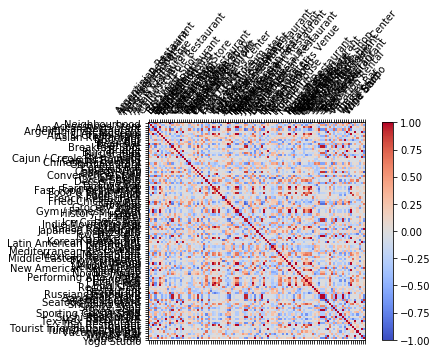

In [103]:
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(sa_grouped.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=50)
ax.set_yticks(ticks)
ax.set_xticklabels(sa_grouped.columns)
ax.set_yticklabels(sa_grouped.columns)
plt.show()

In [104]:
num_top_venues = 3

for hood in sa_grouped['Neighbourhood']:
    print("----"+hood+"----")
    temp = sa_grouped[sa_grouped['Neighbourhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----1080 Inc.----
         venue  freq
0        Hotel  0.10
1          Bar  0.07
2  Coffee Shop  0.06


----120 W 5th St----
         venue  freq
0        Hotel  0.09
1  Coffee Shop  0.07
2          Bar  0.06


----1L/1M Bus Stop----
         venue  freq
0        Hotel  0.10
1  Coffee Shop  0.06
2          Bar  0.06


----422 Congress----
         venue  freq
0        Hotel  0.11
1          Bar  0.06
2  Coffee Shop  0.06


----6th & Red River----
    venue  freq
0   Hotel  0.11
1     Bar  0.07
2  Lounge  0.05


----Allen Edmonds----
    venue  freq
0   Hotel  0.11
1     Bar  0.06
2  Lounge  0.05


----Astrotech----
          venue  freq
0         Hotel  0.10
1   Coffee Shop  0.06
2  Cocktail Bar  0.05


----Atticus Circle----
    venue  freq
0   Hotel  0.12
1     Bar  0.05
2  Lounge  0.05


----Austin B-Cycle----
         venue  freq
0        Hotel  0.09
1          Bar  0.06
2  Coffee Shop  0.06


----Austin Marathon and Half-Marathon----
          venue  freq
0         Hotel  0.11
1  

In [105]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [106]:
num_top_venues = 20

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighbourhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighbourhoods_venues_sorted = pd.DataFrame(columns=columns)
neighbourhoods_venues_sorted['Neighbourhood'] = sa_grouped['Neighbourhood']

for ind in np.arange(sa_grouped.shape[0]):
    neighbourhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(sa_grouped.iloc[ind, :], num_top_venues)

neighbourhoods_venues_sorted

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,...,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue,16th Most Common Venue,17th Most Common Venue,18th Most Common Venue,19th Most Common Venue,20th Most Common Venue
0,1080 Inc.,Hotel,Bar,Coffee Shop,Cocktail Bar,Lounge,Nightclub,Italian Restaurant,Steakhouse,Food Truck,...,Burger Joint,Juice Bar,Grocery Store,Restaurant,Rock Club,Gay Bar,American Restaurant,Seafood Restaurant,Art Museum,Speakeasy
1,120 W 5th St,Hotel,Coffee Shop,Bar,Cocktail Bar,Gay Bar,Italian Restaurant,Nightclub,Lounge,Juice Bar,...,Burger Joint,Sushi Restaurant,Restaurant,Hotel Bar,Movie Theater,Seafood Restaurant,Grocery Store,Speakeasy,Steakhouse,New American Restaurant
2,1L/1M Bus Stop,Hotel,Bar,Coffee Shop,Cocktail Bar,Lounge,Nightclub,Gay Bar,Italian Restaurant,Steakhouse,...,Movie Theater,Seafood Restaurant,Rock Club,Burger Joint,Music Venue,Speakeasy,Grocery Store,Juice Bar,Sushi Restaurant,Restaurant
3,422 Congress,Hotel,Bar,Coffee Shop,Cocktail Bar,Lounge,Nightclub,Restaurant,New American Restaurant,Burger Joint,...,Italian Restaurant,Food Truck,Hotel Bar,Rock Club,Gay Bar,Movie Theater,Seafood Restaurant,Speakeasy,Grocery Store,Sushi Restaurant
4,6th & Red River,Hotel,Bar,Cocktail Bar,Lounge,Coffee Shop,Nightclub,Restaurant,Movie Theater,Italian Restaurant,...,Food Truck,Burger Joint,Sushi Restaurant,Steakhouse,Speakeasy,New American Restaurant,Music Venue,Seafood Restaurant,Art Museum,Gay Bar
5,Allen Edmonds,Hotel,Bar,Lounge,Coffee Shop,Cocktail Bar,Nightclub,Food Truck,Sushi Restaurant,Juice Bar,...,Movie Theater,Burger Joint,Gay Bar,Steakhouse,Speakeasy,Music Venue,American Restaurant,Seafood Restaurant,New American Restaurant,Art Museum
6,Astrotech,Hotel,Coffee Shop,Cocktail Bar,Bar,Italian Restaurant,Nightclub,Restaurant,Food Truck,Lounge,...,Hotel Bar,Burger Joint,Juice Bar,Gay Bar,Movie Theater,Seafood Restaurant,Speakeasy,Grocery Store,Sushi Restaurant,Art Museum
7,Atticus Circle,Hotel,Lounge,Bar,Coffee Shop,Cocktail Bar,Nightclub,Food Truck,Sushi Restaurant,Juice Bar,...,Gay Bar,Movie Theater,Burger Joint,Steakhouse,Speakeasy,Music Venue,American Restaurant,Seafood Restaurant,New American Restaurant,Art Museum
8,Austin B-Cycle,Hotel,Bar,Coffee Shop,Cocktail Bar,Nightclub,Lounge,Gay Bar,Movie Theater,Food Truck,...,Sushi Restaurant,Italian Restaurant,Hotel Bar,Restaurant,Rock Club,Seafood Restaurant,Grocery Store,Speakeasy,Steakhouse,Burger Joint
9,Austin Marathon and Half-Marathon,Hotel,Coffee Shop,Bar,Cocktail Bar,Nightclub,Lounge,Food Truck,Juice Bar,Burger Joint,...,Italian Restaurant,Gay Bar,Movie Theater,Restaurant,Rock Club,Grocery Store,Seafood Restaurant,Music Venue,Art Museum,Speakeasy


In [107]:
sa_grouped_clustering = sa_grouped.drop('Neighbourhood', 1)

In [109]:
distortions = []
K = range(1,8)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(sa_grouped_clustering)
    kmeanModel.fit(sa_grouped_clustering)
    distortions.append(sum(np.min(cdist(sa_grouped_clustering, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / sa_grouped_clustering.shape[0])

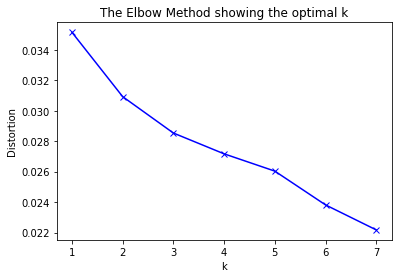

In [110]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

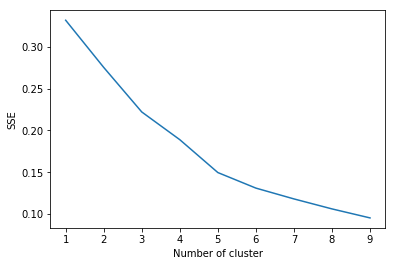

In [111]:
sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(sa_grouped_clustering)
    sa_grouped_clustering["clusters"] = kmeans.labels_
    #print(data["clusters"])
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [112]:
# Calculate Silhoutte score
range_n_clusters = list (range(2,11))
for n_clusters in range_n_clusters:
    clusterer = KMeans (n_clusters=n_clusters)
    preds = clusterer.fit_predict(sa_grouped_clustering)
    centers = clusterer.cluster_centers_

    score = silhouette_score (sa_grouped_clustering, preds, metric='euclidean')
    print ("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.6973918197899253)
For n_clusters = 3, silhouette score is 0.7546266258566082)
For n_clusters = 4, silhouette score is 0.7528584653175737)
For n_clusters = 5, silhouette score is 0.8166742575914309)
For n_clusters = 6, silhouette score is 0.9009009141471618)
For n_clusters = 7, silhouette score is 0.960357646958994)
For n_clusters = 8, silhouette score is 0.9595836069314423)
For n_clusters = 9, silhouette score is 0.9611757091918964)
For n_clusters = 10, silhouette score is 0.881259689199929)


In [113]:
epsilon = 0.3
minimumSamples = 7
db = DBSCAN(eps=epsilon, min_samples=minimumSamples).fit(sa_grouped_clustering)
labels = db.labels_
labels

array([ 0,  1,  0,  2,  3,  4,  5,  4,  1,  4,  3,  1,  0,  4,  0,  0,  4,
        1,  0,  0,  4,  4,  0,  4,  5,  3,  5,  0,  3,  4,  0,  4,  0,  0,
        0,  5,  1,  3,  0,  3,  0,  0,  0,  5,  5,  3,  4,  2,  5,  0,  3,
        4,  0,  0,  0,  4,  4,  4,  3,  1,  0,  4,  4,  3,  2,  4,  2,  2,
        2,  5,  4,  6,  6, -1,  5,  5,  3,  4,  0,  2,  4,  2,  1,  0,  0,
        0,  2,  0,  0,  4,  1,  5,  3,  0,  4,  4,  3,  3,  5,  6,  3,  4,
        5,  3,  2,  0,  4,  3,  2,  2,  0,  3,  5,  5,  5,  3,  3,  3,  0,
        0,  1,  0,  2,  4,  5,  4,  0,  4,  5,  3,  5,  4,  4,  2,  3,  6,
        3,  0,  0,  5,  4,  2,  0,  5,  0,  4,  2,  0,  2,  0,  2,  0,  4,
        0,  1,  1,  1,  4,  4, -1,  5,  4,  4,  6,  3,  2,  4,  3,  4,  0,
        0,  6,  4,  6,  2,  4,  4,  5,  5,  2,  4,  2,  5,  0,  1,  0,  2,
        4,  0,  0,  1,  1,  4], dtype=int64)

In [114]:
# Remove repetition in labels by turning it into a set.
unique_labels = set(labels)
unique_labels

{-1, 0, 1, 2, 3, 4, 5, 6}

In [115]:
sa_merged = dataframe_filtered

# add clustering labels
sa_merged['Cluster Labels'] = db.labels_

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
sa_merged = sa_merged.join(neighbourhoods_venues_sorted.set_index('Neighbourhood'), on='name')

sa_merged.head() # check the last columns!

,name,categories,address,cc,city,country,crossStreet,formattedAddress,labeledLatLngs,lat,...,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue,16th Most Common Venue,17th Most Common Venue,18th Most Common Venue,19th Most Common Venue,20th Most Common Venue
0,CVS pharmacy,Pharmacy,500 Congress Ave,US,Austin,United States,at 5th St,"[500 Congress Ave (at 5th St), Austin, TX 7870...","[{'label': 'display', 'lat': 30.26724477866618...",30.267245,...,Italian Restaurant,Movie Theater,Restaurant,Rock Club,Grocery Store,Gay Bar,Seafood Restaurant,Music Venue,Art Museum,Speakeasy
1,Mexic-Arte Museum,Art Museum,419 Congress Ave,US,Austin,United States,at 5th St,"[419 Congress Ave (at 5th St), Austin, TX 7870...","[{'label': 'display', 'lat': 30.26693695333229...",30.266937,...,Juice Bar,Food Truck,Burger Joint,Steakhouse,Speakeasy,New American Restaurant,Music Venue,Seafood Restaurant,Art Museum,Gay Bar
2,Downtown Austin,Neighborhood,NaN,US,Austin,United States,NaN,"[Austin, TX 78704, United States]","[{'label': 'display', 'lat': 30.26703061234996...",30.267031,...,Sushi Restaurant,Italian Restaurant,Movie Theater,Rock Club,Grocery Store,Gay Bar,Seafood Restaurant,Music Venue,American Restaurant,Speakeasy
3,Bus Stop 512 - 5th & Congress,Bus Station,Congress Ave,US,Austin,United States,at 5th St,"[Congress Ave (at 5th St), Austin, TX 78701, U...","[{'label': 'display', 'lat': 30.26715680348320...",30.267157,...,Italian Restaurant,Gay Bar,Movie Theater,Restaurant,Rock Club,Grocery Store,Seafood Restaurant,Music Venue,Art Museum,Speakeasy
4,Vaquero Taquero,Taco Place,NaN,US,Austin,United States,NaN,"[Austin, TX, United States]","[{'label': 'display', 'lat': 30.267127, 'lng':...",30.267127,...,Sushi Restaurant,Italian Restaurant,Movie Theater,Rock Club,Grocery Store,Gay Bar,Seafood Restaurant,Music Venue,American Restaurant,Speakeasy


In [116]:
sa_merged.loc[sa_merged['Cluster Labels'] == -1, sa_merged.columns[[1] + list(range(5, sa_merged.shape[1]))]]

,categories,country,crossStreet,formattedAddress,labeledLatLngs,lat,lng,neighborhood,postalCode,state,...,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue,16th Most Common Venue,17th Most Common Venue,18th Most Common Venue,19th Most Common Venue,20th Most Common Venue
73,Office,United States,NaN,"[Texas, United States]","[{'label': 'display', 'lat': 30.26737949388138...",30.267379,-97.743095,NaN,NaN,Texas,...,Gay Bar,Movie Theater,Burger Joint,Steakhouse,Speakeasy,Music Venue,American Restaurant,Seafood Restaurant,New American Restaurant,Art Museum
159,Food Truck,United States,NaN,"[Austin, TX 78702, United States]","[{'label': 'display', 'lat': 30.26735001913169...",30.267350,-97.744065,NaN,78702,TX,...,Food Truck,Juice Bar,Movie Theater,Grocery Store,Restaurant,Hotel Bar,New American Restaurant,Seafood Restaurant,Music Venue,American Restaurant


In [117]:
cluster=sa_merged.loc[sa_merged['Cluster Labels'] == -1, sa_merged.columns[[1] + list(range(5, sa_merged.shape[1]))]]

In [118]:
export_csv = cluster.to_csv (r'C:\Users\sudha27\export_dataframe_austin.csv', index = None, header=True) #Don't forget to add '.csv' at the end of the path


In [133]:
sa_merged.loc[sa_merged['Cluster Labels'] == 0, sa_merged.columns[[1] + list(range(5, sa_merged.shape[1]))]]

,categories,country,crossStreet,formattedAddress,labeledLatLngs,lat,lng,neighborhood,postalCode,state,...,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue,16th Most Common Venue,17th Most Common Venue,18th Most Common Venue,19th Most Common Venue,20th Most Common Venue
0,Pharmacy,United States,at 5th St,"[500 Congress Ave (at 5th St), Austin, TX 7870...","[{'label': 'display', 'lat': 30.26724477866618...",30.267245,-97.743364,NaN,78701,TX,...,Italian Restaurant,Movie Theater,Restaurant,Rock Club,Grocery Store,Gay Bar,Seafood Restaurant,Music Venue,Art Museum,Speakeasy
2,Neighborhood,United States,NaN,"[Austin, TX 78704, United States]","[{'label': 'display', 'lat': 30.26703061234996...",30.267031,-97.743089,NaN,78704,TX,...,Sushi Restaurant,Italian Restaurant,Movie Theater,Rock Club,Grocery Store,Gay Bar,Seafood Restaurant,Music Venue,American Restaurant,Speakeasy
12,Bar,United States,at 5th St,"[422 Congress Ave Ste D (at 5th St), Austin, T...","[{'label': 'display', 'lat': 30.2671262965541,...",30.267126,-97.743322,NaN,78701,TX,...,Sushi Restaurant,Italian Restaurant,Gay Bar,Movie Theater,Rock Club,Grocery Store,Seafood Restaurant,Music Venue,Art Museum,Speakeasy
14,City,United States,NaN,"[Texas, United States]","[{'label': 'display', 'lat': 30.27166964239251...",30.271670,-97.743859,NaN,NaN,Texas,...,Burger Joint,Lounge,Mediterranean Restaurant,Comedy Club,Convenience Store,Music Venue,Mexican Restaurant,Gift Shop,Hotel Bar,Latin American Restaurant
15,Antique Shop,United States,NaN,"[Austin, TX 78701, United States]","[{'label': 'display', 'lat': 30.267157, 'lng':...",30.267157,-97.742859,NaN,78701,TX,...,Food Truck,Burger Joint,Rock Club,Gay Bar,Restaurant,Seafood Restaurant,Grocery Store,Speakeasy,Steakhouse,New American Restaurant
18,Boutique,United States,NaN,"[504 Congress Ave, Austin, TX 78701, United St...","[{'label': 'display', 'lat': 30.26743050782529...",30.267431,-97.743084,NaN,78701,TX,...,Gay Bar,Movie Theater,Burger Joint,Steakhouse,Speakeasy,Music Venue,American Restaurant,Seafood Restaurant,New American Restaurant,Art Museum
19,Athletics & Sports,United States,NaN,"[PO Box 684587, Austin, TX 78768, United States]","[{'label': 'display', 'lat': 30.26722121229724...",30.267221,-97.743445,NaN,78768,TX,...,Italian Restaurant,Gay Bar,Movie Theater,Restaurant,Rock Club,Grocery Store,Seafood Restaurant,Music Venue,Art Museum,Speakeasy
22,Gym / Fitness Center,United States,at Congress Ave,"[115 East 6th St. (at Congress Ave), Austin, T...","[{'label': 'display', 'lat': 30.26745541712263...",30.267455,-97.741789,NaN,78701,TX,...,Juice Bar,Burger Joint,Restaurant,Speakeasy,Seafood Restaurant,Art Museum,Music Venue,Grocery Store,Mediterranean Restaurant,Jewelry Store
27,Bank,United States,NaN,"[401 Congress Ave, Austin, TX 78701, United St...","[{'label': 'display', 'lat': 30.26683999757351...",30.266840,-97.743413,NaN,78701,TX,...,Burger Joint,Food Truck,Sushi Restaurant,Rock Club,Hotel Bar,Grocery Store,New American Restaurant,Gay Bar,Seafood Restaurant,American Restaurant
30,Hotel,United States,NaN,"[604 Brazos Street, Austin, TX 78701, United S...","[{'label': 'display', 'lat': 30.268162, 'lng':...",30.268162,-97.741715,NaN,78701,TX,...,Movie Theater,Mexican Restaurant,Juice Bar,Restaurant,Grocery Store,Seafood Restaurant,Speakeasy,Art Museum,Burger Joint,Donut Shop


In [119]:
cluster0=sa_merged.loc[sa_merged['Cluster Labels'] == 0, sa_merged.columns[[1] + list(range(5, sa_merged.shape[1]))]]

In [120]:
export_csv = cluster0.to_csv (r'C:\Users\sudha27\export_dataframe_austin_cluster0.csv', index = None, header=True) #Don't forget to add

In [134]:
sa_merged.loc[sa_merged['Cluster Labels'] == 1, sa_merged.columns[[1] + list(range(5, sa_merged.shape[1]))]]

,categories,country,crossStreet,formattedAddress,labeledLatLngs,lat,lng,neighborhood,postalCode,state,...,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue,16th Most Common Venue,17th Most Common Venue,18th Most Common Venue,19th Most Common Venue,20th Most Common Venue
1,Art Museum,United States,at 5th St,"[419 Congress Ave (at 5th St), Austin, TX 7870...","[{'label': 'display', 'lat': 30.26693695333229...",30.266937,-97.742977,NaN,78701,TX,...,Juice Bar,Food Truck,Burger Joint,Steakhouse,Speakeasy,New American Restaurant,Music Venue,Seafood Restaurant,Art Museum,Gay Bar
8,Coffee Shop,United States,6th Ave,"[515 Congress Ave (6th Ave), Austin, TX 78701,...","[{'label': 'display', 'lat': 30.26777557948782...",30.267776,-97.742713,NaN,78701,TX,...,Juice Bar,Movie Theater,Sushi Restaurant,Speakeasy,Burger Joint,Music Venue,Seafood Restaurant,Art Museum,American Restaurant,Rock Club
11,Other Great Outdoors,United States,NaN,"[500 Congress Ave, Austin, TX 78701, United St...","[{'label': 'display', 'lat': 30.26684219567992...",30.266842,-97.743365,NaN,78701,TX,...,Food Truck,Sushi Restaurant,Restaurant,Grocery Store,Hotel Bar,Rock Club,New American Restaurant,Gay Bar,Seafood Restaurant,Music Venue
17,Shoe Store,United States,NaN,"[501 Congress Ave, Austin, TX 78701, United St...","[{'label': 'display', 'lat': 30.26731064, 'lng...",30.267311,-97.742694,NaN,78701,TX,...,Movie Theater,Burger Joint,Gay Bar,Steakhouse,Speakeasy,Music Venue,American Restaurant,Seafood Restaurant,New American Restaurant,Art Museum
36,Tech Startup,United States,NaN,"[101 W 6th St #400, Austin, TX 78701, United S...","[{'label': 'display', 'lat': 30.268047, 'lng':...",30.268047,-97.743200,NaN,78701,TX,...,Steakhouse,Food Truck,Movie Theater,Burger Joint,Speakeasy,Music Venue,Seafood Restaurant,Art Museum,American Restaurant,Rock Club
59,Office,United States,NaN,"[Austin, TX, United States]","[{'label': 'display', 'lat': 30.26771325538273...",30.267713,-97.743036,NaN,NaN,TX,...,Juice Bar,Movie Theater,Sushi Restaurant,Speakeasy,Burger Joint,Music Venue,Seafood Restaurant,Art Museum,American Restaurant,Rock Club
82,Food Truck,United States,NaN,"[Texas, United States]","[{'label': 'display', 'lat': 30.26716041564941...",30.267160,-97.742897,NaN,NaN,Texas,...,Movie Theater,Burger Joint,Gay Bar,Steakhouse,Speakeasy,Music Venue,American Restaurant,Seafood Restaurant,New American Restaurant,Art Museum
90,Design Studio,United States,NaN,"[600 Congress Ave Fl 14, Austin, TX 78701, Uni...","[{'label': 'display', 'lat': 30.26852, 'lng': ...",30.268520,-97.743257,NaN,78701,TX,...,Italian Restaurant,Steakhouse,Speakeasy,Restaurant,Rock Club,Seafood Restaurant,Grocery Store,Sushi Restaurant,Music Venue,Burger Joint
120,Office,United States,NaN,"[106 E 6th St, Austin, TX 78701, United States]","[{'label': 'display', 'lat': 30.26796743590469...",30.267967,-97.742368,NaN,78701,TX,...,Restaurant,Rock Club,Gay Bar,Seafood Restaurant,Grocery Store,Speakeasy,Sushi Restaurant,Juice Bar,Burger Joint,Music Venue
154,Parking,United States,NaN,"[Austin, TX, United States]","[{'label': 'display', 'lat': 30.26701912985800...",30.267019,-97.742591,NaN,NaN,TX,...,Food Truck,Burger Joint,Sushi Restaurant,Steakhouse,Speakeasy,New American Restaurant,Music Venue,Seafood Restaurant,Art Museum,Gay Bar


In [121]:
cluster1=sa_merged.loc[sa_merged['Cluster Labels'] == 1, sa_merged.columns[[1] + list(range(5, sa_merged.shape[1]))]]

In [122]:
export_csv = cluster1.to_csv (r'C:\Users\sudha27\export_dataframe_austin_cluster1.csv', index = None, header=True)

In [135]:
sa_merged.loc[sa_merged['Cluster Labels'] == 2, sa_merged.columns[[1] + list(range(5, sa_merged.shape[1]))]]

,categories,country,crossStreet,formattedAddress,labeledLatLngs,lat,lng,neighborhood,postalCode,state,...,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue,16th Most Common Venue,17th Most Common Venue,18th Most Common Venue,19th Most Common Venue,20th Most Common Venue
3,Bus Station,United States,at 5th St,"[Congress Ave (at 5th St), Austin, TX 78701, U...","[{'label': 'display', 'lat': 30.26715680348320...",30.267157,-97.743378,NaN,78701,TX,...,Italian Restaurant,Gay Bar,Movie Theater,Restaurant,Rock Club,Grocery Store,Seafood Restaurant,Music Venue,Art Museum,Speakeasy
47,Office,United States,4th St,"[401 Congress Ave (4th St), Austin, TX 78701, ...","[{'label': 'display', 'lat': 30.26630371501573...",30.266304,-97.743444,NaN,78701,TX,...,Restaurant,New American Restaurant,Food Truck,Lounge,Grocery Store,Movie Theater,Gay Bar,Seafood Restaurant,Speakeasy,Art Museum
64,Office,United States,W 4th Street,"[401 Congress Ave Ste 2500 (W 4th Street), Aus...","[{'label': 'display', 'lat': 30.26645030989517...",30.266450,-97.742877,NaN,78701,TX,...,Restaurant,Juice Bar,Burger Joint,New American Restaurant,Speakeasy,Hotel Bar,Movie Theater,Art Museum,American Restaurant,Grocery Store
66,Bus Station,United States,NaN,"[Austin, TX, United States]","[{'label': 'display', 'lat': 30.26684084026003...",30.266841,-97.743169,NaN,NaN,TX,...,Food Truck,Sushi Restaurant,Restaurant,Gay Bar,Rock Club,Seafood Restaurant,Grocery Store,New American Restaurant,Hotel Bar,Music Venue
67,None,United States,NaN,"[515 Congress Ave #2260, Austin, TX 78701, Uni...","[{'label': 'display', 'lat': 30.2673089184403,...",30.267309,-97.742622,NaN,78701,TX,...,Movie Theater,Food Truck,Burger Joint,Steakhouse,Speakeasy,American Restaurant,Seafood Restaurant,Art Museum,New American Restaurant,Grocery Store
68,Art Gallery,United States,NaN,"[422 Congress Ave, Austin, TX 78701, United St...","[{'label': 'display', 'lat': 30.26667, 'lng': ...",30.266670,-97.743174,NaN,78701,TX,...,Italian Restaurant,Food Truck,Hotel Bar,Rock Club,Gay Bar,Movie Theater,Seafood Restaurant,Speakeasy,Grocery Store,Sushi Restaurant
79,Bar,United States,5th St,"[422 Congress Ave Ste B (5th St), Austin, TX 7...","[{'label': 'display', 'lat': 30.26710319559420...",30.267103,-97.743327,NaN,78701,TX,...,Sushi Restaurant,Italian Restaurant,Gay Bar,Movie Theater,Rock Club,Grocery Store,Seafood Restaurant,Music Venue,Art Museum,Speakeasy
81,Clothing Store,United States,NaN,"[101 W 6th St, Austin, TX 78701, United States]","[{'label': 'display', 'lat': 30.26792931062886...",30.267929,-97.742868,NaN,78701,TX,...,Juice Bar,Movie Theater,Sushi Restaurant,Speakeasy,Burger Joint,Music Venue,Seafood Restaurant,Art Museum,American Restaurant,Rock Club
86,Tech Startup,United States,East 5th St,"[501 Congress Ave (East 5th St), Austin, TX 78...","[{'label': 'display', 'lat': 30.267624, 'lng':...",30.267624,-97.742883,NaN,78701,TX,...,Juice Bar,Movie Theater,Sushi Restaurant,Speakeasy,Burger Joint,Music Venue,Seafood Restaurant,Art Museum,American Restaurant,Rock Club
104,Bus Stop,United States,NaN,"[Austin, TX, United States]","[{'label': 'display', 'lat': 30.267951, 'lng':...",30.267951,-97.743180,NaN,NaN,TX,...,Juice Bar,Movie Theater,Sushi Restaurant,Speakeasy,Burger Joint,Music Venue,Seafood Restaurant,Art Museum,American Restaurant,Rock Club


In [123]:
cluster2=sa_merged.loc[sa_merged['Cluster Labels'] == 2, sa_merged.columns[[1] + list(range(5, sa_merged.shape[1]))]]

In [124]:
export_csv = cluster2.to_csv (r'C:\Users\sudha27\export_dataframe_austin_cluster2.csv', index = None, header=True)

In [136]:
sa_merged.loc[sa_merged['Cluster Labels'] == 3, sa_merged.columns[[1] + list(range(5, sa_merged.shape[1]))]]

,categories,country,crossStreet,formattedAddress,labeledLatLngs,lat,lng,neighborhood,postalCode,state,...,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue,16th Most Common Venue,17th Most Common Venue,18th Most Common Venue,19th Most Common Venue,20th Most Common Venue
4,Taco Place,United States,NaN,"[Austin, TX, United States]","[{'label': 'display', 'lat': 30.267127, 'lng':...",30.267127,-97.743147,NaN,NaN,TX,...,Sushi Restaurant,Italian Restaurant,Movie Theater,Rock Club,Grocery Store,Gay Bar,Seafood Restaurant,Music Venue,American Restaurant,Speakeasy
10,Bus Line,United States,Congress St,"[W 5th St (Congress St), Austin, TX 78701, Uni...","[{'label': 'display', 'lat': 30.26711877173589...",30.267119,-97.743243,NaN,78701,TX,...,Sushi Restaurant,Italian Restaurant,Movie Theater,Rock Club,Grocery Store,Gay Bar,Seafood Restaurant,Music Venue,Art Museum,Speakeasy
25,Office,United States,N Congress Ave.,"[101 W 6th St Fl 2 (N Congress Ave.), Austin, ...","[{'label': 'display', 'lat': 30.26812096177884...",30.268121,-97.743214,NaN,78701,TX,...,Steakhouse,Food Truck,Movie Theater,Burger Joint,Speakeasy,Music Venue,Seafood Restaurant,Art Museum,American Restaurant,Rock Club
28,Asian Restaurant,United States,NaN,"[120 W 5th St, Austin, TX 78701, United States]","[{'label': 'display', 'lat': 30.267458, 'lng':...",30.267458,-97.743910,NaN,78701,TX,...,Sushi Restaurant,Juice Bar,Restaurant,Hotel Bar,Seafood Restaurant,Movie Theater,Speakeasy,Steakhouse,New American Restaurant,Music Venue
37,Tech Startup,United States,Barton Springs Rd,"[220 S Congress Ave (Barton Springs Rd), Austi...","[{'label': 'display', 'lat': 30.259341, 'lng':...",30.259341,-97.746406,NaN,78701,TX,...,Lounge,Restaurant,Sandwich Place,Burger Joint,Bridge,Karaoke Bar,Wine Bar,American Restaurant,Taco Place,Ice Cream Shop
39,Speakeasy,United States,NaN,"[116 East 5th St, Austin, TX 78701, United Sta...","[{'label': 'display', 'lat': 30.26672262101623...",30.266723,-97.742033,NaN,78701,TX,...,Italian Restaurant,Speakeasy,Grocery Store,Juice Bar,Seafood Restaurant,Sushi Restaurant,New American Restaurant,Art Museum,American Restaurant,Restaurant
45,Pizza Place,United States,4th St,"[408 Congress Ave (4th St), Austin, TX 78701, ...","[{'label': 'display', 'lat': 30.26647482184361...",30.266475,-97.743567,NaN,78701,TX,...,Burger Joint,Hotel Bar,Juice Bar,Gay Bar,Grocery Store,Seafood Restaurant,Speakeasy,Sushi Restaurant,Art Museum,American Restaurant
50,Building,United States,Congress Ave,"[107 W 6th St (Congress Ave), Austin, TX 78701...","[{'label': 'display', 'lat': 30.26815308920476...",30.268153,-97.743153,NaN,78701,TX,...,Steakhouse,Food Truck,Movie Theater,Burger Joint,Speakeasy,Music Venue,Seafood Restaurant,Art Museum,American Restaurant,Rock Club
58,Bar,United States,Brazos,"[121 E 5th St (Brazos), Austin, TX 78701, Unit...","[{'label': 'display', 'lat': 30.26662575096891...",30.266626,-97.742018,NaN,78701,TX,...,Burger Joint,Restaurant,Speakeasy,Seafood Restaurant,Sushi Restaurant,Juice Bar,New American Restaurant,Art Museum,Grocery Store,Mediterranean Restaurant
63,Food,United States,NaN,"[701 Brazos St, Austin, TX 78701, United States]","[{'label': 'display', 'lat': 30.2669, 'lng': -...",30.266900,-97.742800,NaN,78701,TX,...,Food Truck,Burger Joint,Sushi Restaurant,Steakhouse,Speakeasy,New American Restaurant,Music Venue,Seafood Restaurant,Art Museum,Gay Bar


In [125]:
cluster3=sa_merged.loc[sa_merged['Cluster Labels'] == 3, sa_merged.columns[[1] + list(range(5, sa_merged.shape[1]))]]

In [126]:
export_csv = cluster3.to_csv (r'C:\Users\sudha27\export_dataframe_austin_cluster3.csv', index = None, header=True)

In [137]:
sa_merged.loc[sa_merged['Cluster Labels'] == 4, sa_merged.columns[[1] + list(range(5, sa_merged.shape[1]))]]

,categories,country,crossStreet,formattedAddress,labeledLatLngs,lat,lng,neighborhood,postalCode,state,...,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue,16th Most Common Venue,17th Most Common Venue,18th Most Common Venue,19th Most Common Venue,20th Most Common Venue
5,Food Truck,United States,Neches,"[5th & Neches (Neches), Austin, TX, United Sta...","[{'label': 'display', 'lat': 30.26715215573516...",30.267152,-97.743057,NaN,NaN,TX,...,Sushi Restaurant,Italian Restaurant,Movie Theater,Rock Club,Grocery Store,Gay Bar,Seafood Restaurant,Music Venue,American Restaurant,Speakeasy
7,Bus Station,United States,NaN,"[Austin, TX 78701, United States]","[{'label': 'display', 'lat': 30.26744463779568...",30.267445,-97.743286,NaN,78701,TX,...,Gay Bar,Movie Theater,Burger Joint,Steakhouse,Speakeasy,Music Venue,American Restaurant,Seafood Restaurant,New American Restaurant,Art Museum
9,Restaurant,United States,NaN,"[501 Congress Ave, Austin, TX 78701, United St...","[{'label': 'display', 'lat': 30.26725447325151...",30.267254,-97.742799,NaN,78701,TX,...,Gay Bar,Movie Theater,Burger Joint,Steakhouse,Speakeasy,Music Venue,American Restaurant,Seafood Restaurant,New American Restaurant,Art Museum
13,Tech Startup,United States,Colorado St,"[201 W 5th St (Colorado St), Austin, TX 78701,...","[{'label': 'display', 'lat': 30.26727393336902...",30.267274,-97.743380,NaN,78701,TX,...,Italian Restaurant,Movie Theater,Restaurant,Rock Club,Grocery Store,Gay Bar,Seafood Restaurant,Music Venue,Art Museum,Speakeasy
16,Bar,United States,5th Street,"[422 Congress Ave (5th Street), Austin, TX 787...","[{'label': 'display', 'lat': 30.267365, 'lng':...",30.267365,-97.742925,NaN,78701,TX,...,Gay Bar,Movie Theater,Sushi Restaurant,Burger Joint,Speakeasy,Music Venue,American Restaurant,Seafood Restaurant,New American Restaurant,Art Museum
20,Music Venue,United States,btwn 4th & 5th St.,"[412 Congress Ave (btwn 4th & 5th St.), Austin...","[{'label': 'display', 'lat': 30.26666907980697...",30.266669,-97.743427,NaN,78701,TX,...,Lounge,New American Restaurant,Movie Theater,Hotel Bar,Grocery Store,Rock Club,Gay Bar,Seafood Restaurant,Music Venue,Speakeasy
21,Music Venue,United States,NaN,"[Austin, TX, United States]","[{'label': 'display', 'lat': 30.26715, 'lng': ...",30.267150,-97.743060,NaN,NaN,TX,...,Sushi Restaurant,Italian Restaurant,Movie Theater,Rock Club,Grocery Store,Gay Bar,Seafood Restaurant,Music Venue,American Restaurant,Speakeasy
23,Cycle Studio,United States,at E 5th St,"[401 Congress Ave (at E 5th St), Austin, TX 78...","[{'label': 'display', 'lat': 30.26675690753962...",30.266757,-97.743282,NaN,78701,TX,...,Burger Joint,Restaurant,Rock Club,Gay Bar,Seafood Restaurant,Grocery Store,Movie Theater,Hotel Bar,Music Venue,American Restaurant
29,Nightclub,United States,5th and Congress,"[422 Congress Ave Ste B (5th and Congress), Au...","[{'label': 'display', 'lat': 30.26717583630986...",30.267176,-97.743409,NaN,78701,TX,...,Italian Restaurant,Gay Bar,Movie Theater,Restaurant,Rock Club,Grocery Store,Seafood Restaurant,Music Venue,Art Museum,Speakeasy
31,Gym,United States,NaN,"[Austin, TX 78701, United States]","[{'label': 'display', 'lat': 30.26726, 'lng': ...",30.267260,-97.742815,NaN,78701,TX,...,Gay Bar,Movie Theater,Burger Joint,Steakhouse,Speakeasy,Music Venue,American Restaurant,Seafood Restaurant,New American Restaurant,Art Museum


In [127]:
cluster4=sa_merged.loc[sa_merged['Cluster Labels'] == 4, sa_merged.columns[[1] + list(range(5, sa_merged.shape[1]))]]

In [128]:
export_csv = cluster4.to_csv (r'C:\Users\sudha27\export_dataframe_austin_cluster4.csv', index = None, header=True)

In [138]:
sa_merged.loc[sa_merged['Cluster Labels'] == 5, sa_merged.columns[[1] + list(range(5, sa_merged.shape[1]))]]

,categories,country,crossStreet,formattedAddress,labeledLatLngs,lat,lng,neighborhood,postalCode,state,...,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue,16th Most Common Venue,17th Most Common Venue,18th Most Common Venue,19th Most Common Venue,20th Most Common Venue
6,Tech Startup,United States,NaN,"[501 Congress Ave, Austin, TX 78701, United St...","[{'label': 'display', 'lat': 30.26722198220683...",30.267222,-97.742727,NaN,78701,TX,...,Movie Theater,Burger Joint,Gay Bar,Steakhouse,Speakeasy,Music Venue,American Restaurant,Seafood Restaurant,New American Restaurant,Art Museum
24,Gay Bar,United States,at 5th St,"[422 Congress Ave (at 5th St), Austin, TX 7870...","[{'label': 'display', 'lat': 30.26717787400610...",30.267178,-97.743407,NaN,78701,TX,...,Italian Restaurant,Gay Bar,Movie Theater,Restaurant,Rock Club,Grocery Store,Seafood Restaurant,Music Venue,Art Museum,Speakeasy
26,Storage Facility,United States,NaN,"[Austin, TX, United States]","[{'label': 'display', 'lat': 30.26744, 'lng': ...",30.267440,-97.742946,NaN,NaN,TX,...,Gay Bar,Movie Theater,Sushi Restaurant,Burger Joint,Speakeasy,Music Venue,American Restaurant,Seafood Restaurant,New American Restaurant,Art Museum
35,Building,United States,NaN,"[506 Congress Ave Ste 300, Austin, TX 78701, U...","[{'label': 'display', 'lat': 30.26746270920982...",30.267463,-97.743515,NaN,78701,TX,...,Food Truck,Burger Joint,Movie Theater,New American Restaurant,Steakhouse,Speakeasy,Music Venue,Seafood Restaurant,Art Museum,American Restaurant
43,Pop-Up Shop,United States,NaN,"[400 Congress Ave, Austin, TX 78701, United St...","[{'label': 'display', 'lat': 30.26632, 'lng': ...",30.266320,-97.743620,NaN,78701,TX,...,Burger Joint,Hotel Bar,Cocktail Bar,Grocery Store,Seafood Restaurant,Gay Bar,Speakeasy,Steakhouse,Sushi Restaurant,Art Museum
44,Gay Bar,United States,Congress,"[103 E 5th St (Congress), Austin, TX 78701, Un...","[{'label': 'display', 'lat': 30.26708580906351...",30.267086,-97.743233,NaN,78701,TX,...,Sushi Restaurant,Italian Restaurant,Movie Theater,Rock Club,Grocery Store,Gay Bar,Seafood Restaurant,Music Venue,Art Museum,Speakeasy
48,Bakery,United States,NaN,"[orders@barriebaking.com, Austin, TX, United S...","[{'label': 'display', 'lat': 30.267221, 'lng':...",30.267221,-97.743003,NaN,NaN,TX,...,Movie Theater,Burger Joint,Gay Bar,Steakhouse,Speakeasy,Music Venue,American Restaurant,Seafood Restaurant,New American Restaurant,Art Museum
69,Office,United States,Suite 2020,"[515 Congress Ave (Suite 2020), Austin, TX 787...","[{'label': 'display', 'lat': 30.267286, 'lng':...",30.267286,-97.742340,NaN,78701,TX,...,Burger Joint,Juice Bar,Grocery Store,New American Restaurant,Speakeasy,Seafood Restaurant,Art Museum,American Restaurant,Rock Club,Restaurant
74,Building,United States,btw Congress & Lavaca,[504 Congress Ave Ste 300 (btw Congress & Lava...,"[{'label': 'display', 'lat': 30.26742576631508...",30.267426,-97.743237,NaN,78701,TX,...,Gay Bar,Movie Theater,Burger Joint,Steakhouse,Speakeasy,Music Venue,American Restaurant,Seafood Restaurant,New American Restaurant,Art Museum
75,Bus Line,United States,at 4th St.,"[Congress (at 4th St.), Austin, TX 78701, Unit...","[{'label': 'display', 'lat': 30.26634518798553...",30.266345,-97.743445,NaN,78701,TX,...,Hotel Bar,Burger Joint,Juice Bar,Gay Bar,Movie Theater,Seafood Restaurant,Speakeasy,Grocery Store,Sushi Restaurant,Art Museum


In [129]:
cluster5=sa_merged.loc[sa_merged['Cluster Labels'] == 5, sa_merged.columns[[1] + list(range(5, sa_merged.shape[1]))]]

In [130]:
export_csv = cluster5.to_csv (r'C:\Users\sudha27\export_dataframe_austin_cluster5.csv', index = None, header=True)

In [139]:
sa_merged.loc[sa_merged['Cluster Labels'] == 6, sa_merged.columns[[1] + list(range(5, sa_merged.shape[1]))]]

,categories,country,crossStreet,formattedAddress,labeledLatLngs,lat,lng,neighborhood,postalCode,state,...,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue,16th Most Common Venue,17th Most Common Venue,18th Most Common Venue,19th Most Common Venue,20th Most Common Venue
71,Paper / Office Supplies Store,United States,NaN,"[Texas, United States]","[{'label': 'display', 'lat': 30.2665727875703,...",30.266573,-97.743482,NaN,NaN,Texas,...,Food Truck,Lounge,Juice Bar,Art Museum,Rock Club,Gay Bar,Movie Theater,Wine Bar,Speakeasy,Grocery Store
72,Food Truck,United States,NaN,"[Austin, TX 78701, United States]","[{'label': 'display', 'lat': 30.26765019016622...",30.267650,-97.744007,NaN,78701,TX,...,Restaurant,Food Truck,Hotel Bar,Seafood Restaurant,Grocery Store,Speakeasy,Steakhouse,Burger Joint,Music Venue,Movie Theater
99,Dry Cleaner,United States,btw Congress & Brazos,"[401 Congress Ave (btw Congress & Brazos), Aus...","[{'label': 'display', 'lat': 30.266399, 'lng':...",30.266399,-97.742779,NaN,78701,TX,...,Restaurant,Juice Bar,Burger Joint,New American Restaurant,Grocery Store,Speakeasy,Hotel Bar,Movie Theater,Art Museum,American Restaurant
135,Mediterranean Restaurant,United States,NaN,"[515 Congress Ave, Austin, TX 78701, United St...","[{'label': 'display', 'lat': 30.2676096, 'lng'...",30.267610,-97.742442,NaN,78701,TX,...,Movie Theater,Sushi Restaurant,Burger Joint,Speakeasy,Music Venue,Juice Bar,Seafood Restaurant,Art Museum,American Restaurant,Rock Club
164,Tech Startup,United States,6th St.,"[515 Congress Ave (6th St.), Austin, TX 78701,...","[{'label': 'display', 'lat': 30.26772450584655...",30.267725,-97.742941,NaN,78701,TX,...,Juice Bar,Movie Theater,Sushi Restaurant,Speakeasy,Burger Joint,Music Venue,Seafood Restaurant,Art Museum,American Restaurant,Rock Club
172,Tech Startup,United States,NaN,"[Austin, TX, United States]","[{'label': 'display', 'lat': 30.266753, 'lng':...",30.266753,-97.742238,NaN,NaN,TX,...,Italian Restaurant,Restaurant,Burger Joint,Juice Bar,Speakeasy,New American Restaurant,Art Museum,American Restaurant,Grocery Store,Rock Club
174,Office,United States,6th Street,"[515 Congress Ave (6th Street), Austin, TX 787...","[{'label': 'display', 'lat': 30.26745662652000...",30.267457,-97.742718,NaN,78701,TX,...,Movie Theater,Food Truck,Burger Joint,Steakhouse,Speakeasy,American Restaurant,Seafood Restaurant,Art Museum,Grocery Store,Rock Club


In [131]:
cluster6=sa_merged.loc[sa_merged['Cluster Labels'] == 6, sa_merged.columns[[1] + list(range(5, sa_merged.shape[1]))]]

In [132]:
export_csv = cluster6.to_csv (r'C:\Users\sudha27\export_dataframe_austin_cluster6.csv', index = None, header=True)